In [1]:
import pandas as pd
import numpy as np
import time
import sys
import gc
import pickle

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
enc=LabelEncoder()

# Importing Sales_train.csv

In [4]:
sales_train = pd.read_csv('sales_train.csv')

In [5]:
sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [6]:
sales_train = sales_train[(sales_train.item_price < 100000 )& (sales_train.item_cnt_day < 1001)].reset_index(drop=True)

In [7]:
sales_train = sales_train[sales_train.item_price > 0].reset_index(drop = True)

In [8]:
sales_train['revenue'] = sales_train['item_price']*sales_train['item_cnt_day']

# Importing Items.csv

In [9]:
items = pd.read_csv('items.csv')

In [10]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


# Importing test.csv

In [11]:
test = pd.read_csv('test.csv')

In [12]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


# Importing shops1.csv

In [13]:
shops1 = pd.read_csv('shops1.csv')

In [14]:
shops1

,Unnamed: 0,shop_name,shop_id,shop_eng,city
0,0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 francs",Yakutsk
1,1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" fran",Yakutsk
2,2,"Адыгея ТЦ ""Мега""",2,"Adygea shopping center ""Mega""",Adygea
3,3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRK ""October-Kinomir""",Balashikha
4,4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky shopping center ""Volga Mall""",Volzhsky
5,5,"Вологда ТРЦ ""Мармелад""",5,"Vologda SEC ""Marmelad""",Vologda
6,6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)",Voronezh
7,7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh TRC ""Maksimir""",Voronezh
8,8,"Воронеж ТРЦ Сити-Парк ""Град""",8,"Voronezh TRC City-Park ""City""",Voronezh
9,9,Выездная Торговля,9,Offsite Trade,Offsite


In [15]:
shops1.loc[shops1.shop_name == 'Сергиев Посад ТЦ "7Я"', 'shop_name'] = 'СергиевПосад ТЦ "7Я"'

In [16]:
shops1["shop_category_name"] = shops1.shop_name.str.split(" ").map( lambda x: x[1] )

In [17]:
shops1["city_id"] = enc.fit_transform(shops1.city)

In [18]:
shops1["shop_cat_id"] = enc.fit_transform( shops1.shop_category_name)

In [19]:
shops1

,Unnamed: 0,shop_name,shop_id,shop_eng,city,shop_category_name,city_id,shop_cat_id
0,0,"!Якутск Орджоникидзе, 56 фран",0,"! Yakutsk Ordzhonikidze, 56 francs",Yakutsk,"Орджоникидзе,",29,4
1,1,"!Якутск ТЦ ""Центральный"" фран",1,"! Yakutsk TC ""Central"" fran",Yakutsk,ТЦ,29,8
2,2,"Адыгея ТЦ ""Мега""",2,"Adygea shopping center ""Mega""",Adygea,ТЦ,0,8
3,3,"Балашиха ТРК ""Октябрь-Киномир""",3,"Balashikha TRK ""October-Kinomir""",Balashikha,ТРК,1,6
4,4,"Волжский ТЦ ""Волга Молл""",4,"Volzhsky shopping center ""Volga Mall""",Volzhsky,ТЦ,27,8
5,5,"Вологда ТРЦ ""Мармелад""",5,"Vologda SEC ""Marmelad""",Vologda,ТРЦ,26,7
6,6,"Воронеж (Плехановская, 13)",6,"Voronezh (Plekhanovskaya, 13)",Voronezh,"(Плехановская,",28,1
7,7,"Воронеж ТРЦ ""Максимир""",7,"Voronezh TRC ""Maksimir""",Voronezh,ТРЦ,28,7
8,8,"Воронеж ТРЦ Сити-Парк ""Град""",8,"Voronezh TRC City-Park ""City""",Voronezh,ТРЦ,28,7
9,9,Выездная Торговля,9,Offsite Trade,Offsite,Торговля,14,9


In [20]:
shops=shops1[['shop_id','city_id','shop_cat_id']]

# Importing Item_cat1.csv

In [21]:
item_cat1= pd.read_csv('item_cat1.csv')

In [22]:
item_cat1

,Unnamed: 0,item_category_name,item_category_id,item_eng
0,0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones
1,1,Аксессуары - PS2,1,Accessories - PS2
2,2,Аксессуары - PS3,2,Accessories - PS3
3,3,Аксессуары - PS4,3,Accessories - PS4
4,4,Аксессуары - PSP,4,Accessories - PSP
...,...,...,...,...
79,79,Служебные,79,Service
80,80,Служебные - Билеты,80,Service - Tickets
81,81,Чистые носители (шпиль),81,Blank media (spire)
82,82,Чистые носители (штучные),82,Blank media (piece)


In [23]:
item_cat1['split'] = item_cat1['item_eng'].str.split("-")

In [24]:
item_cat1

,Unnamed: 0,item_category_name,item_category_id,item_eng,split
0,0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,"[PC , Headsets / Headphones]"
1,1,Аксессуары - PS2,1,Accessories - PS2,"[Accessories , PS2]"
2,2,Аксессуары - PS3,2,Accessories - PS3,"[Accessories , PS3]"
3,3,Аксессуары - PS4,3,Accessories - PS4,"[Accessories , PS4]"
4,4,Аксессуары - PSP,4,Accessories - PSP,"[Accessories , PSP]"
...,...,...,...,...,...
79,79,Служебные,79,Service,[Service]
80,80,Служебные - Билеты,80,Service - Tickets,"[Service , Tickets]"
81,81,Чистые носители (шпиль),81,Blank media (spire),[Blank media (spire)]
82,82,Чистые носители (штучные),82,Blank media (piece),[Blank media (piece)]


In [25]:
item_cat1['type'] = item_cat1['split'].map(lambda x: x[0].strip())

In [26]:
item_cat1['type_id'] = enc.fit_transform(item_cat1['type'])

In [27]:
item_cat1["subtype1"] = item_cat1['type'].apply(lambda x: x[1].strip() if len(x)>1 else x[0].strip())

In [28]:
item_cat1['subtype_id'] = enc.fit_transform(item_cat1['subtype1'])

In [29]:
item_cat1

,Unnamed: 0,item_category_name,item_category_id,item_eng,split,type,type_id,subtype1,subtype_id
0,0,PC - Гарнитуры/Наушники,0,PC - Headsets / Headphones,"[PC , Headsets / Headphones]",PC,16,C,1
1,1,Аксессуары - PS2,1,Accessories - PS2,"[Accessories , PS2]",Accessories,0,c,3
2,2,Аксессуары - PS3,2,Accessories - PS3,"[Accessories , PS3]",Accessories,0,c,3
3,3,Аксессуары - PS4,3,Accessories - PS4,"[Accessories , PS4]",Accessories,0,c,3
4,4,Аксессуары - PSP,4,Accessories - PSP,"[Accessories , PSP]",Accessories,0,c,3
...,...,...,...,...,...,...,...,...,...
79,79,Служебные,79,Service,[Service],Service,22,e,4
80,80,Служебные - Билеты,80,Service - Tickets,"[Service , Tickets]",Service,22,e,4
81,81,Чистые носители (шпиль),81,Blank media (spire),[Blank media (spire)],Blank media (spire),4,l,6
82,82,Чистые носители (штучные),82,Blank media (piece),[Blank media (piece)],Blank media (piece),3,l,6


In [30]:
item_cat = item_cat1[['item_category_id','type_id', 'subtype_id']]

In [31]:
from itertools import product

In [32]:

cols  = ["date_block_num", "shop_id", "item_id"]

In [33]:
ts=time.time()
matrix = []
for i in range(34):
    sales = sales_train[sales_train.date_block_num == i]
    matrix.append( np.array(list( product( [i], sales.shop_id.unique(), sales.item_id.unique() ) ), dtype = np.int16) )
matrix = pd.DataFrame( np.vstack(matrix), columns = cols )
matrix['date_block_num'] = matrix['date_block_num'].astype(np.int8)
matrix['shop_id'] = matrix['shop_id'].astype(np.int8)
matrix['item_id'] = matrix['item_id'].astype(np.int16)
matrix.sort_values(cols,inplace=True)

In [34]:
matrix

,date_block_num,shop_id,item_id
139255,0,0,19
141495,0,0,27
144968,0,0,28
142661,0,0,29
138947,0,0,32
...,...,...,...
10768788,33,59,22162
10768978,33,59,22163
10769644,33,59,22164
10771170,33,59,22166


In [35]:
ts=time.time()
group = sales_train.groupby( ["date_block_num", "shop_id", "item_id"] ).agg( {"item_cnt_day": ["sum"]} )
group.columns = ["item_cnt_month"]
group.reset_index(inplace = True)
matrix = pd.merge(matrix, group, on = cols, how = "left" )
matrix["item_cnt_month"] = matrix["item_cnt_month"].fillna(0).astype(np.float16)

In [36]:
test["date_block_num"] = 34
test['date_block_num'] = test['date_block_num'].astype(np.int8)
test['shop_id'] = test['shop_id'].astype(np.int8)
test['item_id'] = test['item_id'].astype(np.int16)

In [37]:
matrix = pd.concat([matrix, test.drop(["ID"],axis = 1)],\
                   ignore_index=True, sort=False, keys=cols)

In [38]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,19,0.0
1,0,0,27,0.0
2,0,0,28,0.0
3,0,0,29,0.0
4,0,0,32,6.0
...,...,...,...,...
11127999,34,45,18454,NaN
11128000,34,45,16188,NaN
11128001,34,45,15757,NaN
11128002,34,45,19648,NaN


In [39]:
ts = time.time()
matrix = pd.merge( matrix, shops, on = ["shop_id"], how = "left" )
time.time()-ts

1.097179889678955

In [40]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_id,shop_cat_id
0,0,0,19,0.0,29,4
1,0,0,27,0.0,29,4
2,0,0,28,0.0,29,4
3,0,0,29,0.0,29,4
4,0,0,32,6.0,29,4
...,...,...,...,...,...,...
11127999,34,45,18454,NaN,20,8
11128000,34,45,16188,NaN,20,8
11128001,34,45,15757,NaN,20,8
11128002,34,45,19648,NaN,20,8


In [41]:
matrix = pd.merge(matrix, items, on = ["item_id"], how = "left")


In [42]:
matrix = pd.merge( matrix, item_cat, on = ["item_category_id"], how = "left" )

In [43]:
matrix["month"] = (matrix["date_block_num"]%12)+1

In [44]:
matrix["year"] = (matrix["date_block_num"]//12)+2013

In [45]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_id,shop_cat_id,item_name,item_category_id,type_id,subtype_id,month,year
0,0,0,19,0.0,29,4,/ЗОЛОТАЯ КОЛЛЕКЦИЯ м/ф-72,40,14,8,1,2013
1,0,0,27,0.0,29,4,"007 Legends [PS3, русская версия]",19,10,2,1,2013
2,0,0,28,0.0,29,4,"007 Legends [PС, Jewel, русская версия]",30,17,1,1,2013
3,0,0,29,0.0,29,4,"007 Legends [Xbox 360, русская версия]",23,10,2,1,2013
4,0,0,32,6.0,29,4,1+1,40,14,8,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,NaN,20,8,СБ. Союз 55,55,15,10,11,2015
11128000,34,45,16188,NaN,20,8,Настольная игра Нано Кёрлинг,64,11,5,11,2015
11128001,34,45,15757,NaN,20,8,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,15,10,11,2015
11128002,34,45,19648,NaN,20,8,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,14,8,11,2015


In [46]:
ts = time.time()


def lag_feature( df,lags, cols ):
    for col in cols:
        print(col)
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        for i in lags:
            print(i)
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df
matrix = lag_feature( matrix, [1,2,3], ["item_cnt_month"] )

matrix = matrix[matrix["date_block_num"] >= 3]


matrix.fillna( 0, inplace = True)

item_cnt_month
1
2
3


In [47]:
matrix.isna().sum()

date_block_num          0
shop_id                 0
item_id                 0
item_cnt_month          0
city_id                 0
shop_cat_id             0
item_name               0
item_category_id        0
type_id                 0
subtype_id              0
month                   0
year                    0
item_cnt_month_lag_1    0
item_cnt_month_lag_2    0
item_cnt_month_lag_3    0
dtype: int64

In [48]:
matrix.head(5)

,date_block_num,shop_id,item_id,item_cnt_month,city_id,shop_cat_id,item_name,item_category_id,type_id,subtype_id,month,year,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3
1122795,3,2,27,0.0,0,8,"007 Legends [PS3, русская версия]",19,10,2,4,2013,0.0,0.0,1.0
1122796,3,2,28,0.0,0,8,"007 Legends [PС, Jewel, русская версия]",30,17,1,4,2013,0.0,0.0,0.0
1122797,3,2,30,0.0,0,8,007: КООРДИНАТЫ «СКАЙФОЛЛ»,40,14,8,4,2013,1.0,0.0,0.0
1122798,3,2,31,1.0,0,8,007: КООРДИНАТЫ «СКАЙФОЛЛ» (BD),37,13,8,4,2013,1.0,4.0,0.0
1122799,3,2,32,0.0,0,8,1+1,40,14,8,4,2013,0.0,0.0,0.0


In [49]:
matrix = matrix.drop("item_name", axis=1)

In [50]:
ts = time.time()


data = matrix.copy()
# del matrix
gc.collect()

train_X = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
train_y = data[data.date_block_num < 33]['item_cnt_month']
val_X = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
val_y = data[data.date_block_num == 33]['item_cnt_month']
test_X = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

del data
gc.collect()


train_y = train_y.clip(0, 20)
val_y = val_y.clip(0, 20)

# print run time
print(f"run time: {time.time()-ts}")

run time: 3.9030675888061523


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(train_X,train_y)

LinearRegression()

In [54]:
lr_pred = lr.predict(val_X)

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
print(np.sqrt(mean_squared_error(val_y,lr_pred)))

1.0647493653049187


In [57]:
from sklearn.model_selection import GridSearchCV, cross_validate
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold

In [58]:
xgb = XGBRegressor(objective='reg:linear',learning_rate=.1,max_depth=10,eval_metric='rmse',n_jobs=-1,n_estimators=100)

In [59]:
xgb.fit(train_X,train_y)

[10:48:24] WARNING: d:\bld\xgboost-split_1619725139497\work\src\objective\regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='approx', validate_parameters=1, verbosity=None)

In [60]:
x_pred = xgb.predict(val_X)

E:\conda\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [61]:
print(np.sqrt(mean_squared_error(val_y,x_pred)))

0.9466374


In [62]:
y=train_y.astype(np.int)

In [63]:
from catboost import CatBoostRegressor

In [64]:
cat = CatBoostRegressor(iterations=100,
                          learning_rate=.35,
                        depth=5,
                       loss_function='RMSE')

In [65]:
cat.fit(train_X,y)

0:	learn: 1.0881099	total: 1.05s	remaining: 1m 43s
1:	learn: 1.0238171	total: 1.74s	remaining: 1m 25s
2:	learn: 0.9905775	total: 2.46s	remaining: 1m 19s
3:	learn: 0.9739930	total: 3.31s	remaining: 1m 19s
4:	learn: 0.9643910	total: 4.29s	remaining: 1m 21s
5:	learn: 0.9588284	total: 5.02s	remaining: 1m 18s
6:	learn: 0.9552378	total: 5.79s	remaining: 1m 16s
7:	learn: 0.9525688	total: 6.81s	remaining: 1m 18s
8:	learn: 0.9507025	total: 7.69s	remaining: 1m 17s
9:	learn: 0.9492708	total: 8.45s	remaining: 1m 16s
10:	learn: 0.9478364	total: 9.51s	remaining: 1m 16s
11:	learn: 0.9470532	total: 10.4s	remaining: 1m 16s
12:	learn: 0.9457471	total: 11.3s	remaining: 1m 15s
13:	learn: 0.9451707	total: 12s	remaining: 1m 14s
14:	learn: 0.9432710	total: 13.1s	remaining: 1m 14s
15:	learn: 0.9424651	total: 14s	remaining: 1m 13s
16:	learn: 0.9416658	total: 14.8s	remaining: 1m 12s
17:	learn: 0.9411770	total: 15.6s	remaining: 1m 11s
18:	learn: 0.9406427	total: 16.7s	remaining: 1m 11s
19:	learn: 0.9395585	total

In [66]:
cat_pred = cat.predict(val_X)

In [67]:
print(np.sqrt(mean_squared_error(val_y,cat_pred)))



0.9448904334715172


In [68]:
from sklearn.linear_model import Ridge

In [93]:

rd = Ridge(random_state=42,max_iter=100,tol=.005)

In [94]:
rd.fit(train_X,train_y)

Ridge(max_iter=100, random_state=42, tol=0.005)

In [95]:
rd_pred = rd.predict(val_X)

In [96]:
print(np.sqrt(mean_squared_error(val_y,rd_pred)))

1.0647493654144817


In [97]:
import lightgbm as lgb

In [102]:
lgb_model = lgb.LGBMRegressor(objective='regression',learning_rate=.1,random_state=42)

In [103]:
lgb_model.fit(train_X,train_y)


LGBMRegressor(objective='regression', random_state=42)

In [104]:
lgb_pred = lgb_model.predict(val_X)

In [105]:
print(np.sqrt(mean_squared_error(val_y,lgb_pred)))

0.9527416639564187


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(random_state=42)

In [ ]:
rf.fit(train_X,train_y)

In [ ]:
rf_pred=rf.predict(val_X)

In [ ]:
from optuna.integration import lightgbm as lgb
from lightgbm import plot_importance



In [ ]:
dtrain = lgb.Dataset(train_X, label=train_y)
eval_data = lgb.Dataset(val_X, label=val_y)

In [ ]:
param = {'objective': 'regression', 'metric': 'rmse',
         'verbosity': -1, 'boosting_type': 'gbdt',
         'feature_pre_filter': False, 'lambda_l1': 3.389173441244444e-07,
         'lambda_l2': 3.821912829254147e-07, 'num_leaves': 68, 
         'feature_fraction': 0.4, 'bagging_fraction': 1.0,
         'bagging_freq': 0, 'min_child_samples': 20, 
         'num_iterations': 1000, 'early_stopping_round': 50}

In [ ]:
best = lgb.train(param, 
                 dtrain,
                 valid_sets=eval_data,
                 early_stopping_rounds=50)

print(best.best_score)

In [ ]:
print(best.params)
print(best.best_iteration)
print(best.best_score)

# Analysis

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

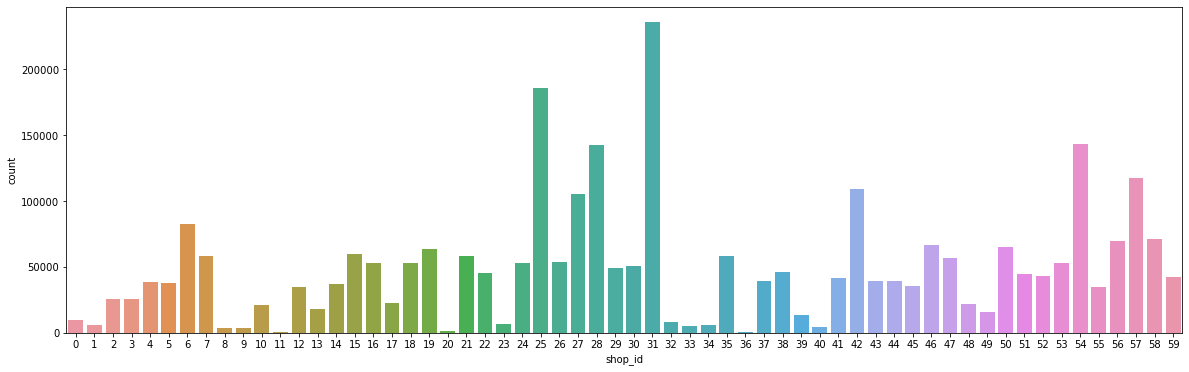

In [71]:
plt.figure(figsize=(20,6))
sns.countplot(sales_train['shop_id'])

#### most sold Item category

In [72]:
train = sales_train.merge(shops1, on='shop_id', how='left')
train = train.merge(items, on='item_id', how='left')
train = train.merge(item_cat1, on='item_category_id', how='left')

train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,item_name,item_category_id,Unnamed: 0_y,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id
0,02.01.2013,0,59,22154,999.00,1.0,999.00,59,"Ярославль ТЦ ""Альтаир""","Yaroslavl TC ""Altair""",...,ЯВЛЕНИЕ 2012 (BD),37,37,Кино - Blu-Ray,Movie - Blu-Ray,"[Movie , Blu, Ray]",Movie,13,o,8
1,03.01.2013,0,25,2552,899.00,1.0,899.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,DEEP PURPLE The House Of Blue Light LP,58,58,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10
2,05.01.2013,0,25,2552,899.00,-1.0,-899.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,DEEP PURPLE The House Of Blue Light LP,58,58,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10
3,06.01.2013,0,25,2554,1709.05,1.0,1709.05,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,DEEP PURPLE Who Do You Think We Are LP,58,58,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10
4,15.01.2013,0,25,2555,1099.00,1.0,1099.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,56,Музыка - CD фирменного производства,Music - branded CD,"[Music , branded CD]",Music,15,u,10


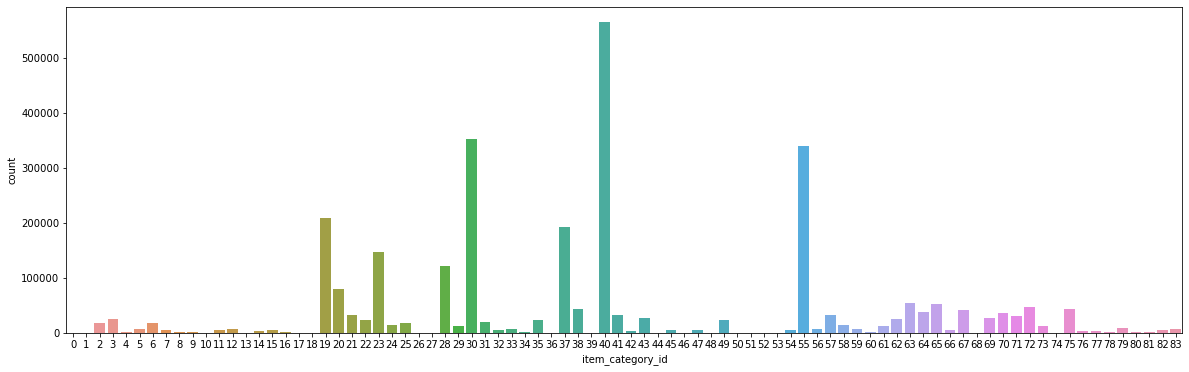

In [73]:
plt.figure(figsize=(20,6))
sns.countplot(train['item_category_id'])

In [74]:
train["month"] = (train["date_block_num"]%12)+1

In [75]:
train["year"] = (train["date_block_num"]//12)+2013

In [76]:
train.groupby('item_category_id').item_cnt_day.sum().sort_values()

item_category_id
51         1.0
10         1.0
1          2.0
53         3.0
52         3.0
        ...   
37    203284.0
19    254886.0
55    348591.0
30    456540.0
40    634171.0
Name: item_cnt_day, Length: 84, dtype: float64

In [77]:
sales_40 = train[train['item_category_id']==40]

In [78]:
sales_40

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,Unnamed: 0_y,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year
186,16.01.2013,0,25,2462,99.0,1.0,99.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,1,2013
264,31.01.2013,0,25,3112,349.0,1.0,349.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,1,2013
334,19.01.2013,0,25,3112,349.0,1.0,349.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,1,2013
349,09.01.2013,0,25,3112,349.0,1.0,349.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,1,2013
439,15.01.2013,0,25,3093,199.0,1.0,199.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935703,23.10.2015,33,25,8237,169.0,1.0,169.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2935726,02.10.2015,33,25,8086,399.0,1.0,399.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2935727,18.10.2015,33,25,8086,399.0,1.0,399.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2935728,20.10.2015,33,25,8086,399.0,1.0,399.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015


#### Which shop has sale most product of item category 40

In [79]:
sales_40.groupby('shop_id').item_cnt_day.sum().sort_values()

shop_id
9        10.0
36       26.0
40       71.0
11       84.0
34      306.0
8       829.0
33      892.0
39     1379.0
12     1567.0
49     1568.0
23     1785.0
48     1829.0
32     2008.0
1      2078.0
2      2366.0
10     3534.0
0      3768.0
3      3782.0
17     3944.0
37     4379.0
14     4439.0
38     4471.0
22     4519.0
43     5002.0
4      5196.0
18     5288.0
45     6519.0
47     6702.0
52     6810.0
53     7133.0
59     7370.0
5      7715.0
41     7891.0
13     8594.0
24     8922.0
35     9245.0
7      9669.0
44     9706.0
16     9804.0
21    11395.0
15    11445.0
26    11875.0
29    12086.0
30    12491.0
46    12638.0
19    12938.0
6     13661.0
51    14554.0
50    14703.0
27    16554.0
56    21463.0
42    22179.0
58    25663.0
28    38588.0
57    44589.0
54    44904.0
25    45176.0
31    76069.0
Name: item_cnt_day, dtype: float64

In [80]:
sales_40.groupby('item_id').item_cnt_day.sum().sort_values()

item_id
0           1.0
17402       1.0
17377       1.0
20206       1.0
17359       1.0
          ...  
11496    2588.0
13811    2664.0
21440    3402.0
21404    3525.0
10298    3563.0
Name: item_cnt_day, Length: 4964, dtype: float64

In [81]:
sales_40[sales_40['item_id']==10298]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,Unnamed: 0_y,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year
933888,31.10.2013,9,44,10298,399.0,1.0,399.0,44,"Самара ТЦ ""Мелодия""","Samara TC ""Melody""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2013
933889,30.10.2013,9,44,10298,359.0,1.0,359.0,44,"Самара ТЦ ""Мелодия""","Samara TC ""Melody""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2013
935218,31.10.2013,9,45,10298,399.0,1.0,399.0,45,"Самара ТЦ ""ПаркХаус""","Samara TC ""ParkHaus""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2013
935219,30.10.2013,9,45,10298,399.0,1.0,399.0,45,"Самара ТЦ ""ПаркХаус""","Samara TC ""ParkHaus""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2013
938183,31.10.2013,9,41,10298,399.0,1.0,399.0,41,"РостовНаДону ТЦ ""Мега""","RostovNaDonu TC ""Mega""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2926982,29.10.2015,33,31,10298,169.0,2.0,338.0,31,"Москва ТЦ ""Семеновский""","Moscow TC ""Semenovsky""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2931547,01.10.2015,33,21,10298,169.0,2.0,338.0,21,"Москва МТРЦ ""Афи Молл""","Moscow MTRC ""Afi Mall""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2932887,31.10.2015,33,25,10298,169.0,1.0,169.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2932888,10.10.2015,33,25,10298,169.0,1.0,169.0,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015


#### most popular shop

In [82]:
popular_shops =train.groupby('shop_id').item_cnt_day.agg([sum])

In [83]:
popular_shops['sum'].sort_values(ascending=False)

shop_id
31    310777.0
25    241920.0
54    185790.0
28    184557.0
42    144934.0
57    141107.0
27    136657.0
6     100489.0
58     81734.0
46     78990.0
56     78079.0
50     76238.0
19     73455.0
12     71308.0
15     71201.0
35     69016.0
21     68560.0
26     67890.0
47     67637.0
7      67058.0
18     65486.0
24     63886.0
55     63388.0
53     61657.0
16     61633.0
30     60828.0
22     60230.0
29     58713.0
38     53886.0
43     50608.0
52     49744.0
41     49324.0
59     48993.0
51     48767.0
14     46375.0
37     46256.0
44     44938.0
4      43942.0
5      42762.0
45     41895.0
2      30620.0
3      28355.0
17     25838.0
48     24909.0
10     24523.0
13     19763.0
49     17090.0
39     16617.0
9      15866.0
0      11705.0
32      8780.0
23      7705.0
34      6451.0
1       6311.0
20      5872.0
33      5482.0
40      4943.0
8       3595.0
11       572.0
36       330.0
Name: sum, dtype: float64

In [84]:
shops1[shops1['shop_id']==31]

,Unnamed: 0,shop_name,shop_id,shop_eng,city,shop_category_name,city_id,shop_cat_id
31,31,"Москва ТЦ ""Семеновский""",31,"Moscow TC ""Semenovsky""",Moscow,ТЦ,10,8


#### most sales by shop

In [85]:
popular_shops_sales =train.groupby('shop_id').item_price.agg([sum])

In [86]:
popular_shops_sales['sum'].sort_values(ascending=False)

shop_id
31    1.707634e+08
25    1.555576e+08
28    1.252947e+08
54    1.096694e+08
27    1.056489e+08
42    1.015515e+08
57    9.131521e+07
6     7.455831e+07
50    6.335695e+07
47    6.280522e+07
18    6.251643e+07
46    6.093469e+07
58    5.846344e+07
35    5.682312e+07
24    5.628828e+07
7     5.607710e+07
15    5.559759e+07
19    5.430200e+07
38    5.360325e+07
56    5.169638e+07
21    5.147937e+07
12    5.049761e+07
16    4.871298e+07
26    4.851612e+07
53    4.792886e+07
29    4.528771e+07
43    4.275150e+07
22    4.224514e+07
30    3.885892e+07
41    3.828370e+07
52    3.764912e+07
37    3.734868e+07
59    3.726479e+07
14    3.600645e+07
4     3.533539e+07
2     3.510444e+07
45    3.377880e+07
5     3.326088e+07
44    2.941958e+07
3     2.647262e+07
48    2.429822e+07
17    2.352167e+07
51    2.185559e+07
55    2.113586e+07
49    1.833824e+07
10    1.644284e+07
39    1.501239e+07
34    7.695497e+06
33    5.594080e+06
0     5.553869e+06
13    5.333601e+06
32    5.098653e+06
23  

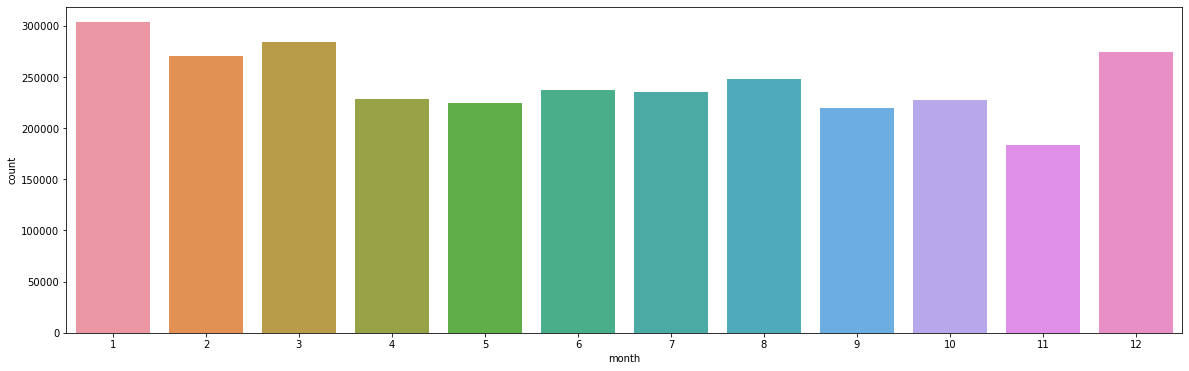

In [87]:
plt.figure(figsize=(20,6))
sns.countplot(train['month'])

In [88]:
sales_month_1  = train[train['month']==1]

In [89]:
sales_month_1['item_category_id'].value_counts()

40    62987
30    39264
55    31248
19    22123
37    18888
      ...  
46        3
74        2
26        1
1         1
0         1
Name: item_category_id, Length: 73, dtype: int64

In [90]:
sales_shop_1 = train[train['shop_id']==1]

  ### Which shop sold which item category more??

In [91]:
k=[]
colm= ['shop_id','item_category_id','item_cat_count']
shop_item_cat = pd.DataFrame(columns=['shop_id','item_category_id','item_cat_count'])
for i in range(len(shops1)):
    sales_shop_1 = train[train['shop_id']==i]
    j=sales_shop_1['item_category_id'].value_counts().index.tolist()[0]
    data=[i,j,sales_shop_1['item_category_id'].value_counts()[j]]
    zipped = zip(colm,data)
    a_dict = dict(zipped)
           
    k.append(a_dict)
    #k.append((i,j,sales_shop_1['item_category_id'].value_counts()[j]))

In [92]:
shop_item_cat = shop_item_cat.append(k,True)

In [93]:
shop_item_cat

,shop_id,item_category_id,item_cat_count
0,0,40,3017
1,1,40,1947
2,2,30,4035
3,3,30,4128
4,4,30,7675
5,5,40,7446
6,6,40,12826
7,7,30,9823
8,8,40,788
9,9,61,875


## Most sold item in categort 40

In [94]:
sales_40['item_id'].value_counts()

21404    2587
10298    2540
21440    2430
21427    2036
11496    1925
         ... 
9897        1
21665       1
19106       1
14509       1
0           1
Name: item_id, Length: 4964, dtype: int64

In [95]:
sales_40[sales_40['item_id']==21404]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,Unnamed: 0_y,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year
1550040,05.04.2014,15,54,21404,399.0,11.0,4389.0,54,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,4,2014
1550041,04.04.2014,15,54,21404,399.0,7.0,2793.0,54,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,4,2014
1550051,06.04.2014,15,54,21404,399.0,4.0,1596.0,54,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,4,2014
1550065,07.04.2014,15,54,21404,399.0,2.0,798.0,54,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,4,2014
1550066,08.04.2014,15,54,21404,399.0,4.0,1596.0,54,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,4,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929731,12.10.2015,33,24,21404,169.0,1.0,169.0,24,"Москва ТК ""Буденовский"" (пав.К7)","Moscow TC ""Budenovsky"" (pav. K7)",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2929732,14.10.2015,33,24,21404,169.0,1.0,169.0,24,"Москва ТК ""Буденовский"" (пав.К7)","Moscow TC ""Budenovsky"" (pav. K7)",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2929845,25.10.2015,33,24,21404,169.0,1.0,169.0,24,"Москва ТК ""Буденовский"" (пав.К7)","Moscow TC ""Budenovsky"" (pav. K7)",...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015
2930900,14.10.2015,33,22,21404,169.0,1.0,169.0,22,Москва Магазин С21,Moscow Shop C21,...,40,Кино - DVD,Movies - DVD,"[Movies , DVD]",Movies,14,o,8,10,2015


## Most sold item

In [96]:
train['item_id'].value_counts()

20949    31340
5822      9408
17717     9067
2808      7479
4181      6853
         ...  
21202        1
2775         1
21215        1
725          1
0            1
Name: item_id, Length: 21806, dtype: int64

In [97]:
train[train['item_id']==20949]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,Unnamed: 0_y,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year
352379,30.04.2013,3,22,20949,5.000000,12.0,60.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,4,2013
352399,29.04.2013,3,22,20949,4.923077,13.0,64.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,4,2013
352400,28.04.2013,3,22,20949,5.000000,4.0,20.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,4,2013
352401,27.04.2013,3,22,20949,5.000000,4.0,20.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,4,2013
352455,24.04.2013,3,22,20949,5.000000,2.0,10.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,4,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930641,02.10.2015,33,22,20949,5.000000,1.0,5.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015
2930642,03.10.2015,33,22,20949,5.000000,2.0,10.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015
2930643,04.10.2015,33,22,20949,5.000000,3.0,15.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015
2930644,05.10.2015,33,22,20949,5.000000,2.0,10.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015


 ## Which shop sold most item of category 71

In [98]:
df_22  = train[train['item_category_id']==71]

In [99]:
df_22

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,Unnamed: 0_y,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year
26685,13.01.2013,0,27,13598,10.0,2.0,20.0,27,"Москва ТЦ ""МЕГА Белая Дача II""","Moscow TC ""MEGA Belaya Dacha II""",...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,1,2013
26686,19.01.2013,0,27,13598,10.0,1.0,10.0,27,"Москва ТЦ ""МЕГА Белая Дача II""","Moscow TC ""MEGA Belaya Dacha II""",...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,1,2013
26687,31.01.2013,0,27,13598,10.0,1.0,10.0,27,"Москва ТЦ ""МЕГА Белая Дача II""","Moscow TC ""MEGA Belaya Dacha II""",...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,1,2013
59414,01.01.2013,0,13,13598,9.0,3.0,27.0,13,"Казань ТЦ ""Бехетле""","Kazan Shopping Center ""Behetle""",...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,1,2013
59415,03.01.2013,0,13,13598,9.0,3.0,27.0,13,"Казань ТЦ ""Бехетле""","Kazan Shopping Center ""Behetle""",...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930641,02.10.2015,33,22,20949,5.0,1.0,5.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015
2930642,03.10.2015,33,22,20949,5.0,2.0,10.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015
2930643,04.10.2015,33,22,20949,5.0,3.0,15.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015
2930644,05.10.2015,33,22,20949,5.0,2.0,10.0,22,Москва Магазин С21,Moscow Shop C21,...,71,"Подарки - Сумки, Альбомы, Коврики д/мыши","Gifts - Bags, Albums, Mouse Pads","[Gifts , Bags, Albums, Mouse Pads]",Gifts,11,i,5,10,2015


In [100]:
df_22['shop_id'].value_counts()

31    884
28    867
53    863
22    848
42    836
56    830
16    828
21    824
7     823
35    817
25    800
14    798
46    790
6     771
59    760
37    760
57    759
24    755
50    744
27    729
26    711
19    711
5     711
4     686
58    667
18    653
47    651
29    648
52    637
54    626
15    617
30    603
38    585
2     568
43    560
39    548
44    514
10    513
45    476
51    465
3     462
17    444
41    439
48    399
49    379
13    374
40    232
34    216
33    156
32     29
11     17
36      8
12      4
0       2
Name: shop_id, dtype: int64

## Most sold item at each shop

In [101]:
jj=train.groupby(['shop_id','item_id']).item_cnt_day.sum() 

In [102]:
jj.loc[jj.groupby(level=0).idxmax()].sort_values()

shop_id  item_id
36       20949         16.0
8        12168         31.0
11       20949         46.0
1        13354         62.0
0        19811         79.0
23       4164          89.0
20       15275        141.0
32       2808         178.0
9        7096         305.0
34       20949        328.0
33       20949        379.0
40       20949        648.0
49       20949        722.0
13       20949       1023.0
44       20949       1060.0
51       20949       1074.0
3        20949       1137.0
2        20949       1319.0
17       20949       1377.0
45       20949       1404.0
10       20949       1413.0
48       20949       1619.0
39       20949       1867.0
52       20949       1920.0
38       20949       2096.0
41       20949       2100.0
5        20949       2163.0
29       20949       2167.0
59       20949       2225.0
43       20949       2266.0
19       20949       2347.0
55       7967        2365.0
4        20949       2465.0
50       20949       2544.0
37       20949       2727.0
18 

In [103]:
jk=train.groupby(['shop_id','item_category_id']).item_cnt_day.sum() 

In [104]:
jk.loc[jk.groupby(level=0).idxmax()].sort_values()

shop_id  item_category_id
36       55                     47.0
11       30                     87.0
40       72                    755.0
8        40                    829.0
33       40                    892.0
34       30                   1016.0
20       61                   1564.0
23       40                   1785.0
49       55                   1838.0
39       30                   1986.0
32       40                   2008.0
1        40                   2078.0
48       55                   3300.0
0        40                   3768.0
17       40                   3944.0
9        30                   4024.0
10       30                   4574.0
3        30                   4779.0
2        30                   4802.0
45       30                   7180.0
37       55                   7549.0
43       30                   7585.0
5        40                   7715.0
52       30                   7749.0
38       30                   8073.0
14       30                   8133.0
13       40 

## Top 10 sold items

In [105]:
train.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False)[:10].sort_values()

item_id
16787      9227.0
1855      10032.0
3731      10099.0
6675      10289.0
3734      11688.0
5822      14515.0
17717     15830.0
3732      16642.0
2808      17245.0
20949    187642.0
Name: item_cnt_day, dtype: float64

In [106]:
train.groupby(["date_block_num"])["item_cnt_day"].sum()

date_block_num
0     131479.0
1     128090.0
2     147142.0
3     107190.0
4     106969.0
5     125381.0
6     116966.0
7     125291.0
8     133332.0
9     127541.0
10    130009.0
11    183341.0
12    116899.0
13    109687.0
14    115297.0
15     96556.0
16     97790.0
17     97429.0
18     91280.0
19    102721.0
20     99208.0
21    107422.0
22    117845.0
23    168755.0
24    110971.0
25     84198.0
26     82014.0
27     77827.0
28     72295.0
29     64114.0
30     63187.0
31     66079.0
32     72843.0
33     68887.0
Name: item_cnt_day, dtype: float64

In [107]:
train.groupby(["month"])["item_cnt_day"].sum()

month
1     359349.0
2     321975.0
3     344453.0
4     281573.0
5     277054.0
6     286924.0
7     271433.0
8     294091.0
9     305383.0
10    303850.0
11    247854.0
12    352096.0
Name: item_cnt_day, dtype: float64

In [108]:
train.groupby(["year"])["item_cnt_day"].sum()

year
2013    1562731.0
2014    1320889.0
2015     762415.0
Name: item_cnt_day, dtype: float64

In [109]:
train['date'] = pd.to_datetime(train['date'])
train['weekday'] = train.date.dt.day_name()
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year,weekday
0,2013-02-01,0,59,22154,999.00,1.0,999.00,59,"Ярославль ТЦ ""Альтаир""","Yaroslavl TC ""Altair""",...,Кино - Blu-Ray,Movie - Blu-Ray,"[Movie , Blu, Ray]",Movie,13,o,8,1,2013,Friday
1,2013-03-01,0,25,2552,899.00,1.0,899.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10,1,2013,Friday
2,2013-05-01,0,25,2552,899.00,-1.0,-899.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10,1,2013,Wednesday
3,2013-06-01,0,25,2554,1709.05,1.0,1709.05,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10,1,2013,Saturday
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD фирменного производства,Music - branded CD,"[Music , branded CD]",Music,15,u,10,1,2013,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935841,2015-10-10,33,25,7409,299.00,1.0,299.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD локального производства,Music - locally produced CD,"[Music , locally produced CD]",Music,15,u,10,10,2015,Saturday
2935842,2015-09-10,33,25,7460,299.00,1.0,299.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD локального производства,Music - locally produced CD,"[Music , locally produced CD]",Music,15,u,10,10,2015,Thursday
2935843,2015-10-14,33,25,7459,349.00,1.0,349.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD локального производства,Music - locally produced CD,"[Music , locally produced CD]",Music,15,u,10,10,2015,Wednesday
2935844,2015-10-22,33,25,7440,299.00,1.0,299.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - MP3,Music - MP3,"[Music , MP3]",Music,15,u,10,10,2015,Thursday


## Sales According to week

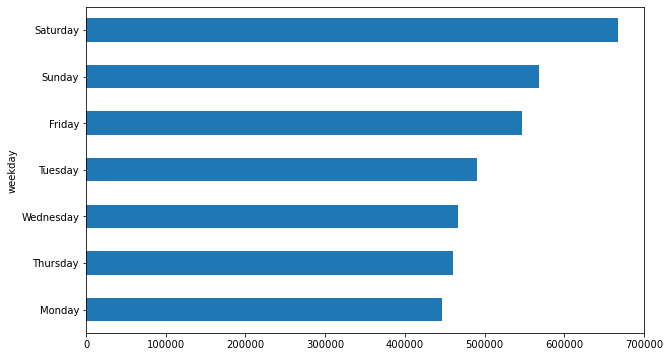

In [110]:
train.groupby('weekday')['item_cnt_day'].sum().sort_values().plot.barh(figsize=(10,6))

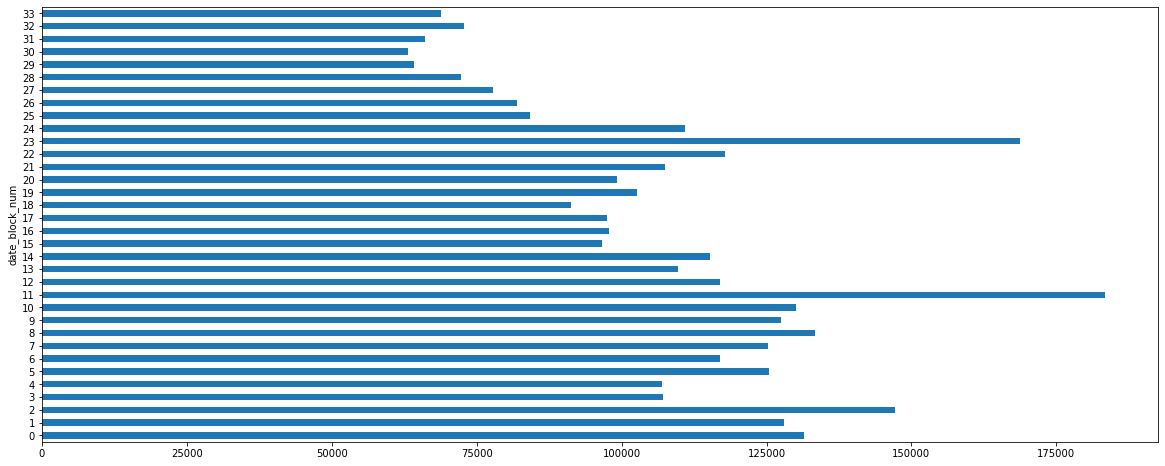

In [111]:
plt.figure(figsize=(20,8))
train.groupby('date_block_num')['item_cnt_day'].sum().plot.barh()

##  Sales Acc. to  Month

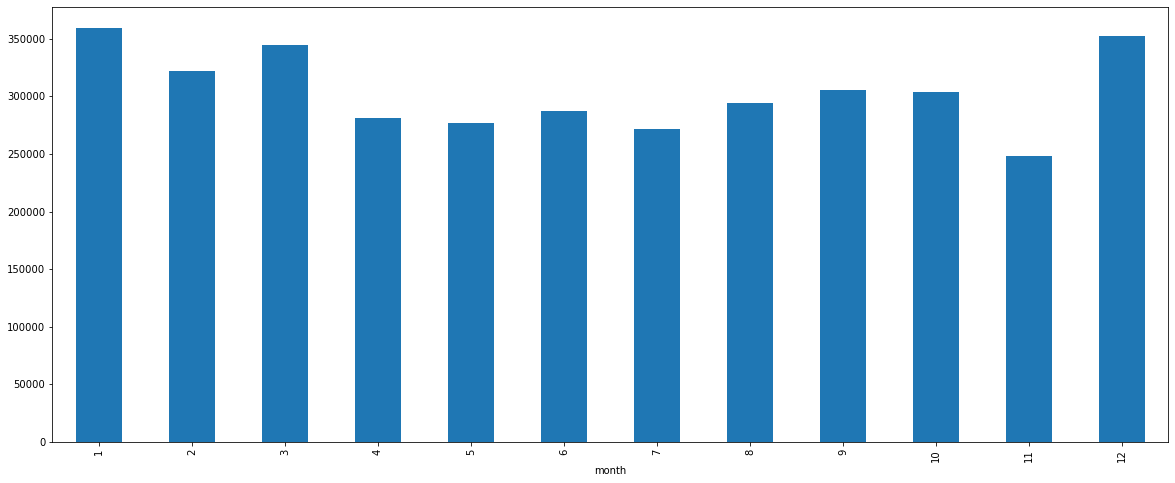

In [112]:
plt.figure(figsize=(20,8))
train.groupby('month')['item_cnt_day'].sum().plot.bar()

## Sales  According to month and year

In [114]:
train1=train.copy(deep=True)

In [115]:
train1 = train1.drop(['shop_name','shop_eng','item_category_name','item_name','item_eng','split','type','subtype1','city','shop_category_name'],axis=1)

In [116]:
train1.drop('date',axis=1,inplace=True)

In [117]:
train1['year'].value_counts()

2013    1267560
2014    1055861
2015     612425
Name: year, dtype: int64

In [118]:
train1['weekday'] = enc.fit_transform(train1['weekday'])

In [119]:
item_rev_month=train1.groupby(['month','year'], as_index=False).agg({"revenue": "sum"})

In [120]:
item_rev_month

,month,year,revenue
0,1,2013,9.194709e+07
1,1,2014,9.822602e+07
2,1,2015,1.189277e+08
3,2,2013,9.066571e+07
4,2,2014,1.074311e+08
5,2,2015,8.659388e+07
6,3,2013,1.049327e+08
7,3,2014,1.091154e+08
8,3,2015,8.647627e+07
9,4,2013,6.915429e+07


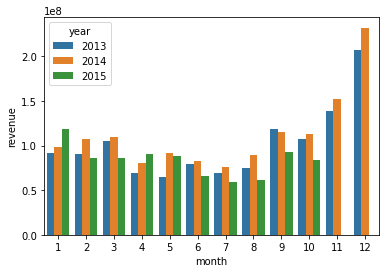

In [121]:
sns.barplot(x='month',y='revenue',hue='year',data=item_rev_month)

#  Record for December,2014

In [122]:
mn_yr_14=train.loc[(train['month'] == 12) & (train['year'] == 2014)]

## Most sold item

In [123]:
mn_yr_14['item_id'].value_counts()

20949    1268
17717     877
3733      777
2429      707
6503      649
         ... 
2085        1
36          1
908         1
2957        1
7580        1
Name: item_id, Length: 6605, dtype: int64

## Count of item 

In [124]:
mn_yr_14.groupby('item_id').item_cnt_day.sum().sort_values(ascending=False)

item_id
20949    12185.0
17717     2002.0
3733      1386.0
2429      1365.0
6503      1183.0
          ...   
6850        -1.0
485         -1.0
19493       -1.0
9345        -1.0
10156       -1.0
Name: item_cnt_day, Length: 6605, dtype: float64

# Most sold item category

In [125]:
mn_yr_14['item_category_id'].value_counts()

40    16671
55    13124
30    10201
19     8681
23     8370
      ...  
44        4
17        3
27        2
59        2
46        1
Name: item_category_id, Length: 64, dtype: int64

##  Count of item category sold

In [126]:
mn_yr_14.groupby('item_category_id').item_cnt_day.sum().sort_values(ascending=False)

item_category_id
40    18876.0
55    13786.0
30    12226.0
71    12185.0
19    10210.0
       ...   
44        4.0
17        3.0
27        2.0
59        2.0
46        1.0
Name: item_cnt_day, Length: 64, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002095D3CCF70>],
      dtype=object)

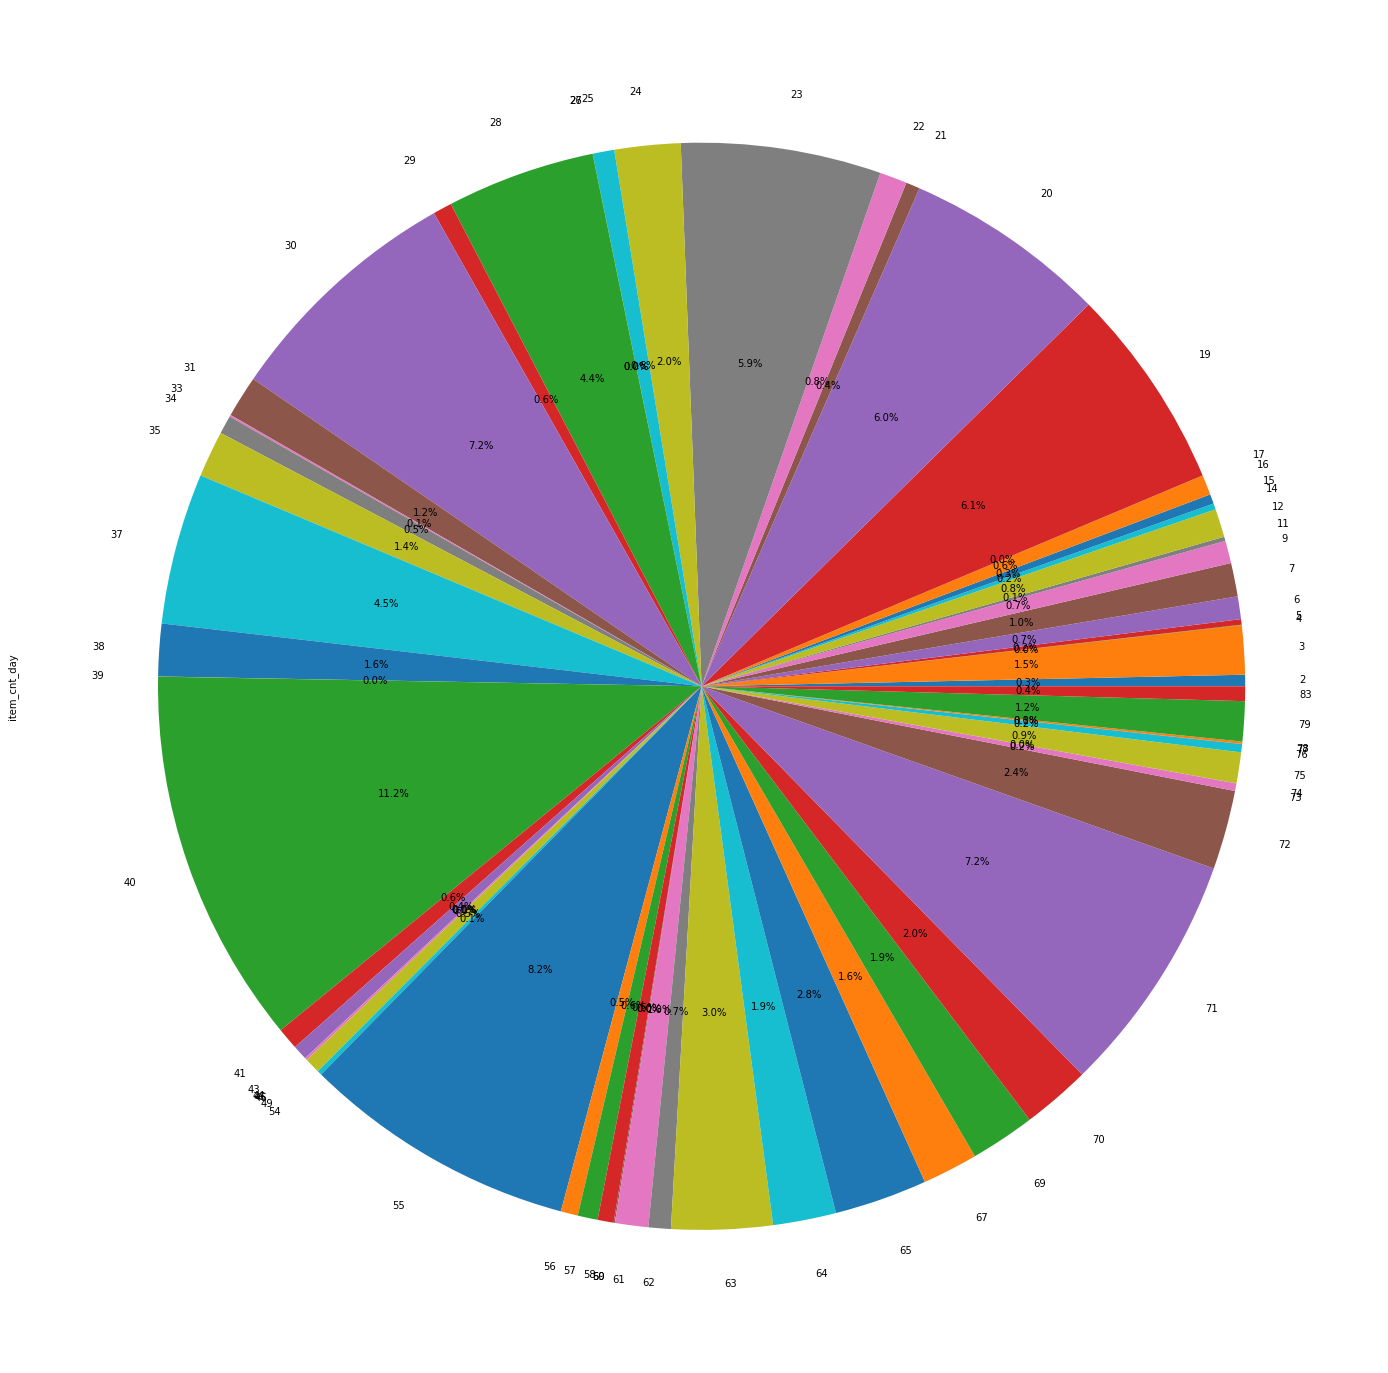

In [127]:
mn_yr_14.groupby('item_category_id').item_cnt_day.sum().plot(kind='pie', subplots=True,
figsize=(25,25), autopct='%1.1f%%')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002095D7E6130>],
      dtype=object)

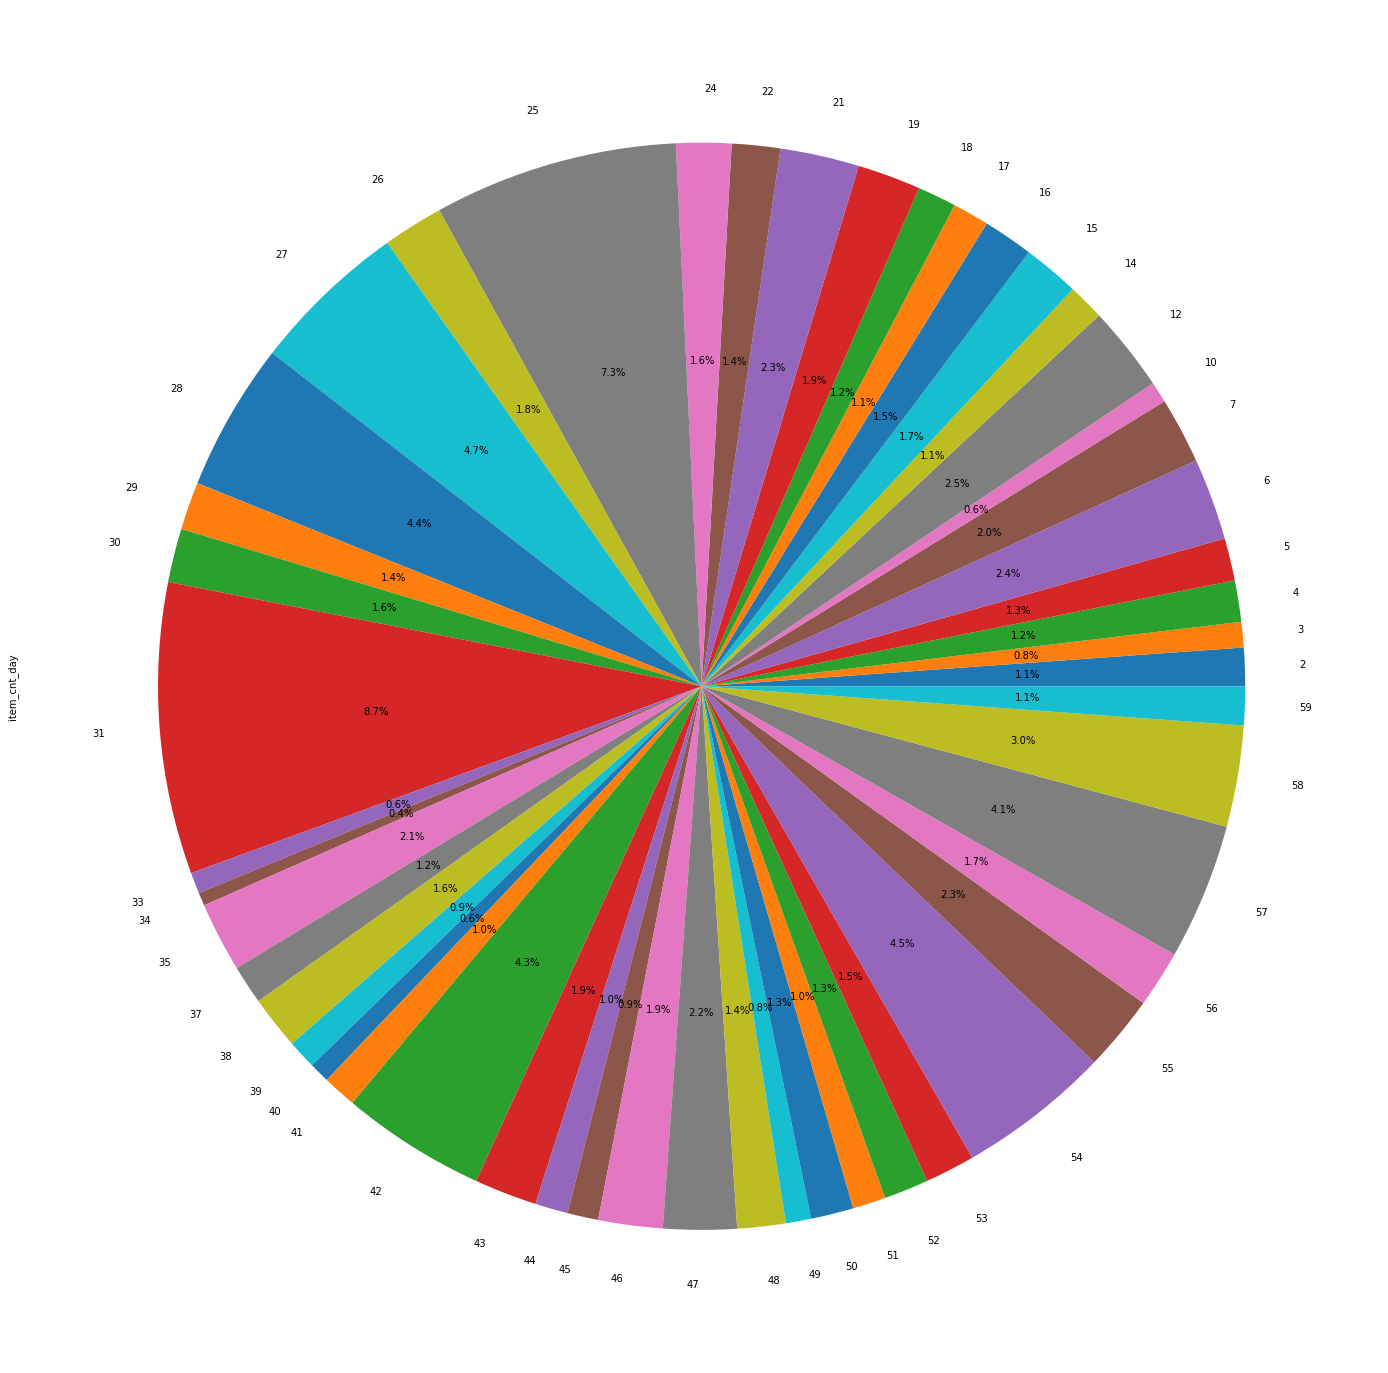

In [128]:
mn_yr_14.groupby('shop_id').item_cnt_day.sum().plot(kind='pie', subplots=True,
figsize=(25,25), autopct='%1.1f%%')

In [129]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year,weekday
0,2013-02-01,0,59,22154,999.00,1.0,999.00,59,"Ярославль ТЦ ""Альтаир""","Yaroslavl TC ""Altair""",...,Кино - Blu-Ray,Movie - Blu-Ray,"[Movie , Blu, Ray]",Movie,13,o,8,1,2013,Friday
1,2013-03-01,0,25,2552,899.00,1.0,899.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10,1,2013,Friday
2,2013-05-01,0,25,2552,899.00,-1.0,-899.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10,1,2013,Wednesday
3,2013-06-01,0,25,2554,1709.05,1.0,1709.05,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - Винил,Music - Vinyl,"[Music , Vinyl]",Music,15,u,10,1,2013,Saturday
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD фирменного производства,Music - branded CD,"[Music , branded CD]",Music,15,u,10,1,2013,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935841,2015-10-10,33,25,7409,299.00,1.0,299.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD локального производства,Music - locally produced CD,"[Music , locally produced CD]",Music,15,u,10,10,2015,Saturday
2935842,2015-09-10,33,25,7460,299.00,1.0,299.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD локального производства,Music - locally produced CD,"[Music , locally produced CD]",Music,15,u,10,10,2015,Thursday
2935843,2015-10-14,33,25,7459,349.00,1.0,349.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - CD локального производства,Music - locally produced CD,"[Music , locally produced CD]",Music,15,u,10,10,2015,Wednesday
2935844,2015-10-22,33,25,7440,299.00,1.0,299.00,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",...,Музыка - MP3,Music - MP3,"[Music , MP3]",Music,15,u,10,10,2015,Thursday


In [130]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'revenue', 'Unnamed: 0_x', 'shop_name', 'shop_eng',
       'city', 'shop_category_name', 'city_id', 'shop_cat_id', 'item_name',
       'item_category_id', 'Unnamed: 0_y', 'item_category_name', 'item_eng',
       'split', 'type', 'type_id', 'subtype1', 'subtype_id', 'month', 'year',
       'weekday'],
      dtype='object')

In [131]:
from sklearn.cluster import KMeans

In [132]:

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(shop_item_cat)
    cs.append(kmeans.inertia_)

E:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


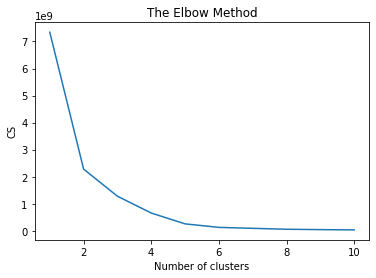

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [134]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [135]:
kmeans.fit(shop_item_cat)

KMeans(n_clusters=5, random_state=0)

In [136]:
shop_item_cat["Cluster"] = kmeans.fit_predict(shop_item_cat)

In [137]:
shop_item_cat

,shop_id,item_category_id,item_cat_count,Cluster
0,0,40,3017,3
1,1,40,1947,3
2,2,30,4035,3
3,3,30,4128,3
4,4,30,7675,0
5,5,40,7446,0
6,6,40,12826,0
7,7,30,9823,0
8,8,40,788,3
9,9,61,875,3


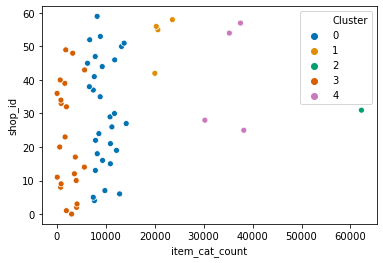

In [138]:
sns.scatterplot(
    x="item_cat_count", y="shop_id", hue="Cluster", data=shop_item_cat,palette='colorblind'
)

# Revenue for year 2013

In [139]:
train_13 = train1[train1['year']==2013]

In [140]:
yr_13=train_13.groupby('shop_id', as_index=False).agg({"revenue": "sum"})

In [141]:
yr_13

,shop_id,revenue
0,0,6.637370e+06
1,1,3.238207e+06
2,2,1.314601e+07
3,3,8.642628e+06
4,4,1.586650e+07
5,5,1.080622e+07
6,6,3.785579e+07
7,7,2.385089e+07
8,8,2.349358e+06
9,9,5.844108e+06


In [142]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kms.fit(yr_13)
    cs.append(kms.inertia_)

E:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


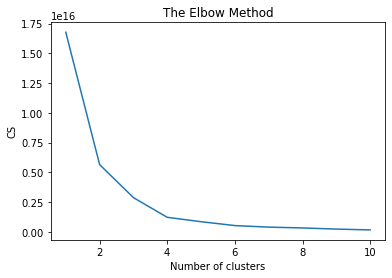

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [144]:
km =KMeans(n_clusters=4)

In [145]:
km.fit(yr_13)

KMeans(n_clusters=4)

In [146]:
yr_13["Cluster"] = kmeans.fit_predict(yr_13)

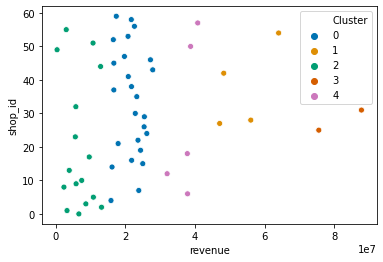

In [147]:
sns.scatterplot(
    x="revenue", y="shop_id", hue="Cluster", data=yr_13,palette='colorblind'
)

# Revenue for 2014

In [148]:
train_14 = train1[train1['year']==2014]

In [149]:
train_14

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,city_id,shop_cat_id,item_category_id,Unnamed: 0_y,type_id,subtype_id,month,year,weekday
1267560,12,54,10297,749.0,1.0,749.0,54,6,8,37,37,13,8,1,2014,2
1267561,12,54,10297,749.0,1.0,749.0,54,6,8,37,37,13,8,1,2014,6
1267562,12,54,10297,749.0,1.0,749.0,54,6,8,37,37,13,8,1,2014,0
1267563,12,54,10296,1599.0,1.0,1599.0,54,6,8,38,38,6,5,1,2014,0
1267564,12,54,10297,749.0,1.0,749.0,54,6,8,37,37,13,8,1,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323416,23,25,5037,2599.0,1.0,2599.0,25,10,6,19,19,10,2,12,2014,6
2323417,23,25,5037,1999.0,2.0,3998.0,25,10,6,19,19,10,2,12,2014,3
2323418,23,25,5038,2999.0,1.0,2999.0,25,10,6,20,20,10,2,12,2014,6
2323419,23,25,5033,1199.0,1.0,1199.0,25,10,6,19,19,10,2,12,2014,4


In [150]:
yr_14=train_14.groupby('shop_id', as_index=False).agg({"revenue": "sum"})

In [151]:
yr_14

,shop_id,revenue
0,2,1.903924e+07
1,3,1.244387e+07
2,4,1.584550e+07
3,5,1.679418e+07
4,6,3.786188e+07
5,7,2.649431e+07
6,9,6.615741e+06
7,10,7.944205e+06
8,12,4.294817e+07
9,13,2.128062e+06


In [152]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kms.fit(yr_14)
    cs.append(kms.inertia_)

E:\conda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


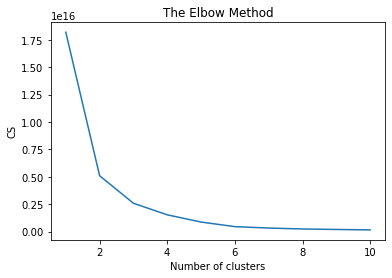

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [154]:
km =KMeans(n_clusters=4)

In [155]:
km.fit(yr_14)

KMeans(n_clusters=4)

In [156]:
yr_14["Cluster"] = km.fit_predict(yr_14)

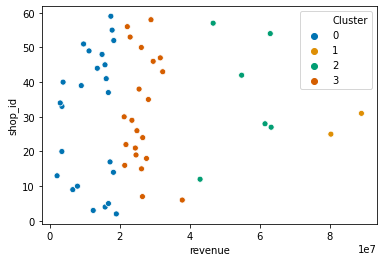

In [157]:
sns.scatterplot(
    x="revenue", y="shop_id", hue="Cluster", data=yr_14,palette='colorblind'
)

# Shop 31


In [158]:
shop31 = train1.loc[(train1['shop_id']==31) & (train1['year']==2013)]

In [159]:
shop31

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,city_id,shop_cat_id,item_category_id,Unnamed: 0_y,type_id,subtype_id,month,year,weekday
60143,0,31,4906,1794.00,2.0,3588.00,31,10,8,19,19,10,2,1,2013,0
60144,0,31,4906,1789.00,1.0,1789.00,31,10,8,19,19,10,2,1,2013,0
60145,0,31,4890,799.00,1.0,799.00,31,10,8,21,21,10,2,1,2013,0
60146,0,31,4901,1499.00,1.0,1499.00,31,10,8,22,22,10,2,1,2013,2
60147,0,31,4901,1499.00,1.0,1499.00,31,10,8,22,22,10,2,1,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249650,11,31,15316,498.00,1.0,498.00,31,10,8,63,63,11,5,12,2013,5
1249651,11,31,15314,399.00,1.0,399.00,31,10,8,63,63,11,5,12,2013,2
1249652,11,31,15314,399.00,1.0,399.00,31,10,8,63,63,11,5,12,2013,0
1249653,11,31,15319,1149.00,1.0,1149.00,31,10,8,63,63,11,5,12,2013,0


In [160]:
shop31.groupby('month').item_cnt_day.sum()

month
1     10173.0
2     11160.0
3     12670.0
4      9621.0
5      9423.0
6     10072.0
7      9500.0
8      9882.0
9     11204.0
10    10754.0
11    11710.0
12    16318.0
Name: item_cnt_day, dtype: float64

In [161]:
shop31_1 = shop31[shop31['month']==7]

In [162]:
shop31_1['item_category_id'].value_counts()

40    2140
55    1107
30     813
37     579
19     351
28     266
57     216
23     204
65     203
43     183
63     154
67     130
41     110
75     104
38      93
21      88
62      84
64      76
22      72
69      65
59      46
70      44
6       41
45      31
71      31
2       28
35      28
25      27
49      27
5       26
72      24
33      20
66      17
73      16
83      14
29      13
3       13
11      12
4       10
14       8
60       8
15       7
68       6
61       5
79       4
56       4
18       1
Name: item_category_id, dtype: int64

In [163]:
item_cat1[item_cat1['item_category_id']==30]

,Unnamed: 0,item_category_name,item_category_id,item_eng,split,type,type_id,subtype1,subtype_id
30,30,Игры PC - Стандартные издания,30,PC Games - Standard Editions,"[PC Games , Standard Editions]",PC Games,17,C,1


# shop25

In [164]:
shop25 = train1.loc[(train1['shop_id']==25) & (train1['year']==2013)]

In [165]:
shop25.groupby('month').item_cnt_day.sum()

month
1      8215.0
2      7934.0
3      9732.0
4      7867.0
5      6860.0
6      8478.0
7      7361.0
8      7784.0
9      9251.0
10     8356.0
11     8632.0
12    12102.0
Name: item_cnt_day, dtype: float64

In [166]:
shop25_ = shop25[shop25['month']==11]

In [167]:
shop25_['item_category_id'].value_counts()

40    1395
55     751
37     584
30     496
19     390
28     229
23     189
67     184
57     140
62     131
69     130
65     114
64     110
38      87
72      86
41      78
43      75
59      74
58      74
63      74
29      64
22      56
75      53
70      48
49      48
25      40
2       38
21      35
6       31
71      30
5       27
35      23
66      22
32      21
20      18
77      18
73      17
45      14
3       13
56      12
61      11
15       9
33       8
14       8
11       8
68       7
39       6
79       5
60       5
12       2
Name: item_category_id, dtype: int64

In [168]:
item_cat1[item_cat1['item_category_id']==55]

,Unnamed: 0,item_category_name,item_category_id,item_eng,split,type,type_id,subtype1,subtype_id
55,55,Музыка - CD локального производства,55,Music - locally produced CD,"[Music , locally produced CD]",Music,15,u,10


# shop34

In [169]:
shop34 = train1.loc[(train1['shop_id']==34) & (train1['year']==2015)]

In [170]:
shop34.groupby('month').item_cnt_day.sum()

month
1     473.0
2     390.0
3     431.0
4     424.0
5     409.0
6     385.0
7     460.0
8     484.0
9     420.0
10    383.0
Name: item_cnt_day, dtype: float64

In [171]:
shop34['item_category_id'].value_counts()

30    569
19    436
20    334
23    308
37    279
40    181
24    174
28    157
63    145
71    140
72    125
65     86
38     83
70     58
3      50
69     49
35     47
64     46
79     45
41     43
55     40
22     40
49     39
67     30
61     30
7      30
83     27
33     24
21     21
58     19
80     18
12     16
42     13
75     12
47     11
29      9
73      9
25      8
15      7
62      6
16      6
6       5
14      2
11      2
56      1
Name: item_category_id, dtype: int64

In [172]:
item_cat1[item_cat1['item_category_id']==30]

,Unnamed: 0,item_category_name,item_category_id,item_eng,split,type,type_id,subtype1,subtype_id
30,30,Игры PC - Стандартные издания,30,PC Games - Standard Editions,"[PC Games , Standard Editions]",PC Games,17,C,1


In [173]:
item_cat1[item_cat1['item_category_id']==19]

,Unnamed: 0,item_category_name,item_category_id,item_eng,split,type,type_id,subtype1,subtype_id
19,19,Игры - PS3,19,Games - PS3,"[Games , PS3]",Games,10,a,2


In [174]:
item_cat_sale=train1.groupby('item_category_id', as_index=False).agg({"revenue": "sum"})

In [175]:
item_cat_sale

,item_category_id,revenue
0,0,2.634000e+02
1,1,4.310000e+02
2,2,4.356447e+07
3,3,6.255353e+07
4,4,1.332177e+06
...,...,...
79,79,1.720083e+07
80,80,8.360800e+06
81,81,1.757410e+05
82,82,3.362661e+05


In [176]:
km_cat =KMeans(n_clusters=4)

In [177]:
km_cat.fit(item_cat_sale)

KMeans(n_clusters=4)

In [178]:
item_cat_sale["Cluster"] = km_cat.fit_predict(item_cat_sale)

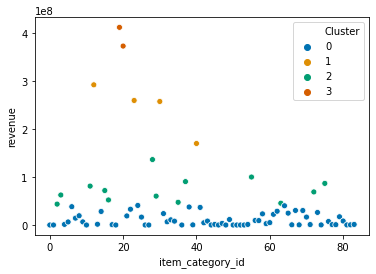

In [179]:
sns.scatterplot(
    x="item_category_id", y="revenue", hue="Cluster", data=item_cat_sale,palette='colorblind'
)

#  Highest item price




In [180]:
train['item_price'].max()

59200.0

In [181]:
train1[train1['item_price']==59200]

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,city_id,shop_cat_id,item_category_id,Unnamed: 0_y,type_id,subtype_id,month,year,weekday
885137,8,12,11365,59200.0,1.0,59200.0,12,16,10,9,9,7,4,9,2013,5


In [182]:
train['revenue'].max()

1829990.0000013

#  Highest revenue for Day

In [183]:
train[train['revenue']>=1829990]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,shop_name,shop_eng,...,item_category_name,item_eng,split,type,type_id,subtype1,subtype_id,month,year,weekday
1107224,2013-11-29,10,42,6675,18118.712871,101.0,1.829990e+06,42,"СПб ТК ""Невский Центр""","SPb TC ""Nevsky Center""",...,Игровые консоли - PS4,Game consoles - PS4,"[Game consoles , PS4]",Game consoles,9,a,2,11,2013,Friday


In [184]:
shop_df = train1[['shop_id','revenue']]

In [185]:
shop_df

,shop_id,revenue
0,59,999.00
1,25,899.00
2,25,-899.00
3,25,1709.05
4,25,1099.00
...,...,...
2935841,25,299.00
2935842,25,299.00
2935843,25,349.00
2935844,25,299.00


In [186]:
km_cat =KMeans(n_clusters=4)

In [187]:
km_cat.fit(shop_df)

KMeans(n_clusters=4)

In [188]:
shop_df["Cluster"] = km_cat.fit_predict(shop_df)

<ipython-input-188-ceb9b996031f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_df["Cluster"] = km_cat.fit_predict(shop_df)


In [189]:
shop_df

,shop_id,revenue,Cluster
0,59,999.00,3
1,25,899.00,3
2,25,-899.00,3
3,25,1709.05,3
4,25,1099.00,3
...,...,...,...
2935841,25,299.00,3
2935842,25,299.00,3
2935843,25,349.00,3
2935844,25,299.00,3


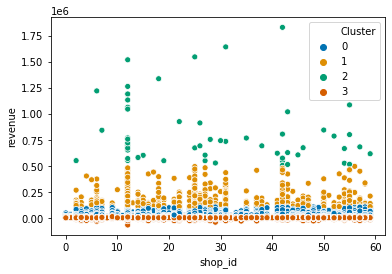

In [190]:
sns.scatterplot(
    x="shop_id", y="revenue", hue="Cluster", data=shop_df,palette='colorblind'
)

In [191]:
cat_df = train1[['item_category_id','revenue']]

In [192]:
km_cat =KMeans(n_clusters=4)

In [193]:
km_cat.fit(cat_df)

KMeans(n_clusters=4)

In [194]:
cat_df["Cluster"] = km_cat.fit_predict(cat_df)

<ipython-input-194-3a945ed14804>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df["Cluster"] = km_cat.fit_predict(cat_df)


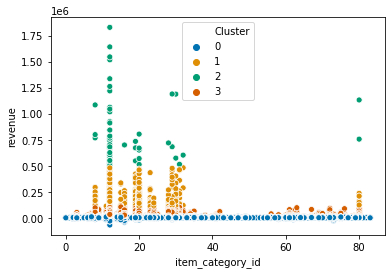

In [195]:
sns.scatterplot(
    x="item_category_id", y="revenue", hue="Cluster", data=cat_df,palette='colorblind'
)

In [196]:
top_shop=train1.groupby('shop_id', as_index=False).agg({"revenue": "sum"})

In [197]:
top_shop

,shop_id,revenue
0,0,6.637370e+06
1,1,3.238207e+06
2,2,4.404964e+07
3,3,3.014085e+07
4,4,4.053965e+07
5,5,3.816043e+07
6,6,9.806745e+07
7,7,6.695766e+07
8,8,2.349358e+06
9,9,1.637284e+07


In [198]:
top_shop=top_shop.sort_values('revenue',ascending=False)

In [199]:
top_shop=top_shop[:25]

In [200]:
top_shop

,shop_id,revenue
31,31,2.352170e+08
25,25,2.164806e+08
28,28,1.597463e+08
42,42,1.519170e+08
54,54,1.419397e+08
27,27,1.406325e+08
57,57,1.129998e+08
12,12,1.118951e+08
6,6,9.806745e+07
18,18,8.339270e+07


In [201]:
top_shop = top_shop.merge(shops1, on='shop_id', how='left')

In [202]:
top_shop

,shop_id,revenue,Unnamed: 0,shop_name,shop_eng,city,shop_category_name,city_id,shop_cat_id
0,31,2.352170e+08,31,"Москва ТЦ ""Семеновский""","Moscow TC ""Semenovsky""",Moscow,ТЦ,10,8
1,25,2.164806e+08,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",Moscow,ТРК,10,6
2,28,1.597463e+08,28,"Москва ТЦ ""МЕГА Теплый Стан"" II","Moscow TC ""MEGA Teply Stan"" II",Moscow,ТЦ,10,8
3,42,1.519170e+08,42,"СПб ТК ""Невский Центр""","SPb TC ""Nevsky Center""",SPb,ТК,19,5
4,54,1.419397e+08,54,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",Khimki,ТЦ,6,8
5,27,1.406325e+08,27,"Москва ТЦ ""МЕГА Белая Дача II""","Moscow TC ""MEGA Belaya Dacha II""",Moscow,ТЦ,10,8
6,57,1.129998e+08,57,"Якутск Орджоникидзе, 56","Yakutsk Ordzhonikidze, 56",Yakutsk,"Орджоникидзе,",29,4
7,12,1.118951e+08,12,Интернет-магазин ЧС,Online store of emergency situations,Online,ЧС,16,10
8,6,9.806745e+07,6,"Воронеж (Плехановская, 13)","Voronezh (Plekhanovskaya, 13)",Voronezh,"(Плехановская,",28,1
9,18,8.339270e+07,18,"Красноярск ТЦ ""Июнь""","Krasnoyarsk TC ""June""",Krasnoyarsk,ТЦ,8,8


In [203]:
top_shop_cat = top_shop.merge(shop_item_cat, on='shop_id', how='left')

In [204]:
top_shop_cat

,shop_id,revenue,Unnamed: 0,shop_name,shop_eng,city,shop_category_name,city_id,shop_cat_id,item_category_id,item_cat_count,Cluster
0,31,2.352170e+08,31,"Москва ТЦ ""Семеновский""","Moscow TC ""Semenovsky""",Moscow,ТЦ,10,8,40,62235,2
1,25,2.164806e+08,25,"Москва ТРК ""Атриум""","Moscow TRK ""Atrium""",Moscow,ТРК,10,6,40,38200,4
2,28,1.597463e+08,28,"Москва ТЦ ""МЕГА Теплый Стан"" II","Moscow TC ""MEGA Teply Stan"" II",Moscow,ТЦ,10,8,40,30252,4
3,42,1.519170e+08,42,"СПб ТК ""Невский Центр""","SPb TC ""Nevsky Center""",SPb,ТК,19,5,40,20027,1
4,54,1.419397e+08,54,"Химки ТЦ ""Мега""","Khimki TC ""Mega""",Khimki,ТЦ,6,8,40,35250,4
5,27,1.406325e+08,27,"Москва ТЦ ""МЕГА Белая Дача II""","Moscow TC ""MEGA Belaya Dacha II""",Moscow,ТЦ,10,8,40,14177,0
6,57,1.129998e+08,57,"Якутск Орджоникидзе, 56","Yakutsk Ordzhonikidze, 56",Yakutsk,"Орджоникидзе,",29,4,40,37520,4
7,12,1.118951e+08,12,Интернет-магазин ЧС,Online store of emergency situations,Online,ЧС,16,10,49,3593,3
8,6,9.806745e+07,6,"Воронеж (Плехановская, 13)","Voronezh (Plekhanovskaya, 13)",Voronezh,"(Плехановская,",28,1,40,12826,0
9,18,8.339270e+07,18,"Красноярск ТЦ ""Июнь""","Krasnoyarsk TC ""June""",Krasnoyarsk,ТЦ,8,8,19,8261,0


In [205]:
top_shop_cat_ = top_shop_cat.merge(train1, on='shop_id', how='left')

In [206]:
top_shop_cat_[top_shop_cat_['year']==2013]['shop_id'].unique()

array([31, 25, 28, 42, 54, 27, 57, 12, 6, 18, 50, 47, 46, 35, 24, 58, 15,
       26, 7, 38, 19, 21, 43, 22, 56], dtype=object)

In [207]:
top_shop_cat_[top_shop_cat_['year']==2014]['shop_id'].unique()

array([31, 25, 28, 42, 54, 27, 57, 12, 6, 18, 50, 47, 46, 35, 24, 58, 15,
       26, 7, 38, 19, 21, 43, 22, 56], dtype=object)

In [208]:
top_shop_cat_[top_shop_cat_['year']==2015]['shop_id'].unique()

array([31, 25, 28, 42, 54, 27, 57, 12, 6, 18, 50, 47, 46, 35, 24, 58, 15,
       26, 7, 38, 19, 21, 43, 22, 56], dtype=object)

# Bottom shops

In [209]:
bottom_shop=train1.groupby('shop_id', as_index=False).agg({"revenue": "sum"})

In [210]:
bottom_shop=bottom_shop.sort_values('revenue')

In [211]:
bottom_shop = bottom_shop[:25]

In [212]:
bottom_shop

,shop_id,revenue
36,36,3.777140e+05
11,11,5.216551e+05
8,8,2.349358e+06
1,1,3.238207e+06
40,40,4.293587e+06
23,23,5.621521e+06
32,32,5.772825e+06
33,33,5.949102e+06
13,13,6.006173e+06
20,20,6.599924e+06


In [213]:
B_shop = bottom_shop.merge(shops1, on='shop_id', how='left')

In [214]:
B_shop

,shop_id,revenue,Unnamed: 0,shop_name,shop_eng,city,shop_category_name,city_id,shop_cat_id
0,36,3.777140e+05,36,"Новосибирск ТРЦ ""Галерея Новосибирск""","Novosibirsk SEC ""Gallery Novosibirsk""",Novosibirsk,ТРЦ,13,7
1,11,5.216551e+05,11,Жуковский ул. Чкалова 39м²,Zhukovsky st. Chkalov 39m²,Zhukovsky,ул.,31,12
2,8,2.349358e+06,8,"Воронеж ТРЦ Сити-Парк ""Град""","Voronezh TRC City-Park ""City""",Voronezh,ТРЦ,28,7
3,1,3.238207e+06,1,"!Якутск ТЦ ""Центральный"" фран","! Yakutsk TC ""Central"" fran",Yakutsk,ТЦ,29,8
4,40,4.293587e+06,40,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной","Rostov-on-Don shopping mall ""Megacenter Horizo...",Rostov-on-Don,ТРК,17,6
5,23,5.621521e+06,23,"Москва ТК ""Буденовский"" (пав.А2)","Moscow TC ""Budenovskiy"" (pav. A2)",Moscow,ТК,10,5
6,32,5.772825e+06,32,"Москва ТЦ ""Серебряный Дом""","Moscow TC ""Silver House""",Moscow,ТЦ,10,8
7,33,5.949102e+06,33,"Мытищи ТРК ""XL-3""","Mytischi TRK ""XL-3""",Mytischi,ТРК,11,6
8,13,6.006173e+06,13,"Казань ТЦ ""Бехетле""","Kazan Shopping Center ""Behetle""",Kazan,ТЦ,5,8
9,20,6.599924e+06,20,"Москва ""Распродажа""","Moscow ""Sale""",Moscow,"""Распродажа""",10,0


In [215]:
bottom_shop_cat = B_shop.merge(shop_item_cat, on='shop_id', how='left')

In [216]:
bottom_shop_cat

,shop_id,revenue,Unnamed: 0,shop_name,shop_eng,city,shop_category_name,city_id,shop_cat_id,item_category_id,item_cat_count,Cluster
0,36,3.777140e+05,36,"Новосибирск ТРЦ ""Галерея Новосибирск""","Novosibirsk SEC ""Gallery Novosibirsk""",Novosibirsk,ТРЦ,13,7,55,50,3
1,11,5.216551e+05,11,Жуковский ул. Чкалова 39м²,Zhukovsky st. Chkalov 39m²,Zhukovsky,ул.,31,12,40,84,3
2,8,2.349358e+06,8,"Воронеж ТРЦ Сити-Парк ""Град""","Voronezh TRC City-Park ""City""",Voronezh,ТРЦ,28,7,40,788,3
3,1,3.238207e+06,1,"!Якутск ТЦ ""Центральный"" фран","! Yakutsk TC ""Central"" fran",Yakutsk,ТЦ,29,8,40,1947,3
4,40,4.293587e+06,40,"РостовНаДону ТРК ""Мегацентр Горизонт"" Островной","Rostov-on-Don shopping mall ""Megacenter Horizo...",Rostov-on-Don,ТРК,17,6,72,698,3
5,23,5.621521e+06,23,"Москва ТК ""Буденовский"" (пав.А2)","Moscow TC ""Budenovskiy"" (pav. A2)",Moscow,ТК,10,5,40,1687,3
6,32,5.772825e+06,32,"Москва ТЦ ""Серебряный Дом""","Moscow TC ""Silver House""",Moscow,ТЦ,10,8,40,1963,3
7,33,5.949102e+06,33,"Мытищи ТРК ""XL-3""","Mytischi TRK ""XL-3""",Mytischi,ТРК,11,6,40,881,3
8,13,6.006173e+06,13,"Казань ТЦ ""Бехетле""","Kazan Shopping Center ""Behetle""",Kazan,ТЦ,5,8,40,7877,0
9,20,6.599924e+06,20,"Москва ""Распродажа""","Moscow ""Sale""",Moscow,"""Распродажа""",10,0,61,586,3


In [217]:
bottom_shop_cat_ = B_shop.merge(train1, on='shop_id', how='left')

In [218]:
bottom_shop_cat_[bottom_shop_cat_['year']==2013]['shop_id'].unique()

array([ 8,  1, 23, 32, 13,  0,  9, 10, 49, 51, 17,  3, 44,  5,  4, 45,  2],
      dtype=int64)

In [219]:
bottom_shop_cat_[bottom_shop_cat_['year']==2014]['shop_id'].unique()

array([40, 33, 13, 20, 34,  9, 39, 10, 49, 51, 48, 17,  3, 44,  5,  4, 45,
        2], dtype=int64)

In [220]:
bottom_shop_cat_[bottom_shop_cat_['year']==2015]['shop_id'].unique()

array([36, 11, 40, 33, 20, 34,  9, 39, 10, 49, 51, 48, 17,  3, 44,  5,  4,
       45,  2], dtype=int64)

# According to Year

In [221]:
top_shop_yr=train1.groupby(['shop_id','year'], as_index=False).agg({"revenue": "sum"})

In [222]:
top_shop_yr

,shop_id,year,revenue
0,0,2013,6.637370e+06
1,1,2013,3.238207e+06
2,2,2013,1.314601e+07
3,2,2014,1.903924e+07
4,2,2015,1.186439e+07
...,...,...,...
154,58,2014,2.893349e+07
155,58,2015,1.810481e+07
156,59,2013,1.738631e+07
157,59,2014,1.747913e+07


# for 2013

In [223]:
top_shop_13 = top_shop_yr[top_shop_yr['year']==2013]

In [224]:
top_shop_13 = top_shop_13.sort_values('revenue',ascending=False)

In [225]:
top_shop_13=top_shop_13[:25]

In [226]:
top_shop_13

,shop_id,year,revenue
81,31,2013,8.779965e+07
63,25,2013,7.555313e+07
141,54,2013,6.401510e+07
72,28,2013,5.601294e+07
106,42,2013,4.824735e+07
69,27,2013,4.708072e+07
150,57,2013,4.077552e+07
129,50,2013,3.873337e+07
14,6,2013,3.785579e+07
45,18,2013,3.778756e+07


# for year 2014

In [227]:
top_shop_14 = top_shop_yr[top_shop_yr['year']==2014]

In [228]:
top_shop_14 = top_shop_14.sort_values('revenue',ascending=False)

In [229]:
top_shop_14=top_shop_14[:25]

In [230]:
top_shop_14

,shop_id,year,revenue
82,31,2014,8.900372e+07
64,25,2014,8.028042e+07
70,27,2014,6.323135e+07
142,54,2014,6.297733e+07
73,28,2014,6.148343e+07
107,42,2014,5.480755e+07
151,57,2014,4.667957e+07
29,12,2014,4.294817e+07
15,6,2014,3.786188e+07
110,43,2014,3.227642e+07


# Revenue for diff. Shop Categories

In [231]:
shop_cat=train1.groupby(['shop_cat_id','item_category_id'], as_index=False).agg({"revenue": "sum"})

In [232]:
shop_cat

,shop_cat_id,item_category_id,revenue
0,0,42,156445.90
1,0,47,400020.00
2,0,61,2383770.76
3,0,62,12590.00
4,0,63,1228765.32
...,...,...,...
691,12,75,1206837.76
692,12,77,1353.00
693,12,81,1680.00
694,12,82,3396.00


In [233]:
train2 = train1.copy(deep=True)

In [234]:
train2 = train2[train2['item_cnt_day']>0]

In [235]:
train2['weekday'] = enc.fit_transform(train2['weekday'])

In [236]:
train2

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,city_id,shop_cat_id,item_category_id,Unnamed: 0_y,type_id,subtype_id,month,year,weekday
0,0,59,22154,999.00,1.0,999.00,59,30,8,37,37,13,8,1,2013,0
1,0,25,2552,899.00,1.0,899.00,25,10,6,58,58,15,10,1,2013,0
3,0,25,2554,1709.05,1.0,1709.05,25,10,6,58,58,15,10,1,2013,2
4,0,25,2555,1099.00,1.0,1099.00,25,10,6,56,56,15,10,1,2013,5
5,0,25,2564,349.00,1.0,349.00,25,10,6,59,59,15,10,1,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935841,33,25,7409,299.00,1.0,299.00,25,10,6,55,55,15,10,10,2015,2
2935842,33,25,7460,299.00,1.0,299.00,25,10,6,55,55,15,10,10,2015,4
2935843,33,25,7459,349.00,1.0,349.00,25,10,6,55,55,15,10,10,2015,6
2935844,33,25,7440,299.00,1.0,299.00,25,10,6,57,57,15,10,10,2015,4


In [237]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kms.fit(train2)
    cs.append(kms.inertia_)

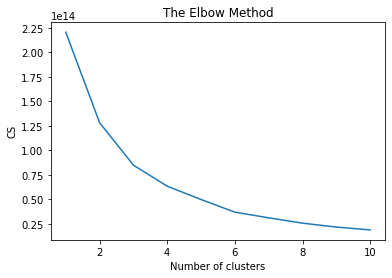

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [434]:
kmns = KMeans(n_clusters=6)

In [435]:
kmns.fit(train2)

KMeans(n_clusters=6)

In [436]:
train2_=train2.copy(deep=True)

In [437]:
train2_['cluster'] = kmns.labels_

In [438]:
train2_.groupby('cluster').revenue.max()

cluster
0    1.907220e+04
1    1.720000e+04
2    1.607700e+04
3    4.947300e+05
4    1.829990e+06
5    1.060660e+05
Name: revenue, dtype: float64

In [440]:
train2_.groupby('cluster').revenue.min()

cluster
0         0.10
1         0.50
2         0.07
3    106776.00
4    503820.00
5     10485.00
Name: revenue, dtype: float64

In [439]:
train2_.groupby('cluster').max()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,city_id,shop_cat_id,item_category_id,Unnamed: 0_y,type_id,subtype_id,month,year,weekday
cluster,,,,,,,,,,,,,,,,
0,33,59,22169,10960.0,1000.0,1.907220e+04,59,31,12,83,83,24,11,12,2015,6
1,33,59,9467,10999.0,325.0,1.720000e+04,59,31,12,80,80,24,11,12,2015,6
2,33,59,15390,10406.0,108.0,1.607700e+04,59,31,12,82,82,24,11,12,2015,6
3,33,59,19445,31599.0,508.0,4.947300e+05,59,31,12,80,80,24,11,12,2015,6
4,32,59,19445,27990.0,669.0,1.829990e+06,59,30,11,80,80,23,5,12,2015,6
5,33,59,22102,59200.0,539.0,1.060660e+05,59,31,12,80,80,24,11,12,2015,6


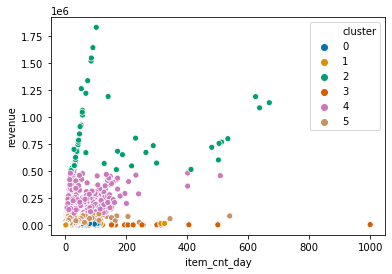

In [245]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue='cluster', data=train2_,palette='colorblind'
)

In [433]:
train2

,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Unnamed: 0_x,city_id,shop_cat_id,item_category_id,Unnamed: 0_y,type_id,subtype_id,month,year,weekday
0,0,59,22154,999.00,1.0,999.00,59,30,8,37,37,13,8,1,2013,0
1,0,25,2552,899.00,1.0,899.00,25,10,6,58,58,15,10,1,2013,0
3,0,25,2554,1709.05,1.0,1709.05,25,10,6,58,58,15,10,1,2013,2
4,0,25,2555,1099.00,1.0,1099.00,25,10,6,56,56,15,10,1,2013,5
5,0,25,2564,349.00,1.0,349.00,25,10,6,59,59,15,10,1,2013,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935841,33,25,7409,299.00,1.0,299.00,25,10,6,55,55,15,10,10,2015,2
2935842,33,25,7460,299.00,1.0,299.00,25,10,6,55,55,15,10,10,2015,4
2935843,33,25,7459,349.00,1.0,349.00,25,10,6,55,55,15,10,10,2015,6
2935844,33,25,7440,299.00,1.0,299.00,25,10,6,57,57,15,10,10,2015,4


In [432]:
train2.groupby('cluster').revenue.max()

KeyError: 'cluster'

# Item_cnt vs Revenue

In [246]:
item_day  = train2[['item_cnt_day','revenue']]

In [247]:
item_day

,item_cnt_day,revenue
0,1.0,999.00
1,1.0,899.00
3,1.0,1709.05
4,1.0,1099.00
5,1.0,349.00
...,...,...
2935841,1.0,299.00
2935842,1.0,299.00
2935843,1.0,349.00
2935844,1.0,299.00


In [248]:
kmns = KMeans(n_clusters=3)

In [249]:
kmns.fit(item_day)

KMeans(n_clusters=3)

In [250]:
item_day['cluster'] = kmns.labels_

<ipython-input-250-cf6c97db8591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_day['cluster'] = kmns.labels_


In [251]:
item_day.groupby('cluster').revenue.max()

cluster
0    3.939000e+04
1    1.829990e+06
2    3.399660e+05
Name: revenue, dtype: float64

In [252]:
item_day.groupby('cluster').revenue.min()

cluster
0         0.07
1    360499.00
2     39446.00
Name: revenue, dtype: float64

In [253]:
item_day.groupby('cluster').item_cnt_day.max()

cluster
0    1000.0
1     669.0
2     539.0
Name: item_cnt_day, dtype: float64

In [254]:
item_day.groupby('cluster').item_cnt_day.min()

cluster
0     1.0
1    13.0
2     1.0
Name: item_cnt_day, dtype: float64

In [255]:
item_day.groupby('cluster').item_cnt_day.mean()

cluster
0      1.223209
1    124.609524
2     18.288675
Name: item_cnt_day, dtype: float64

In [256]:
df_item_day=item_day.groupby('cluster', as_index=False).agg({"revenue": "max"})

In [257]:
df_item_day

,cluster,revenue
0,0,3.939000e+04
1,1,1.829990e+06
2,2,3.399660e+05


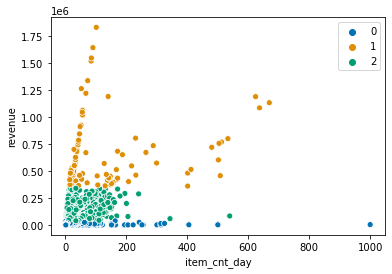

In [258]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue=kmns.labels_, data=item_day,palette='colorblind'
)

In [259]:
item_day.drop('cluster',axis=1)

,item_cnt_day,revenue
0,1.0,999.00
1,1.0,899.00
3,1.0,1709.05
4,1.0,1099.00
5,1.0,349.00
...,...,...
2935841,1.0,299.00
2935842,1.0,299.00
2935843,1.0,349.00
2935844,1.0,299.00


# Optimizing K-Means

# 1

In [260]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,tol=.01 ,random_state = 42)
    kms.fit(item_day)
    cs.append(kms.inertia_)

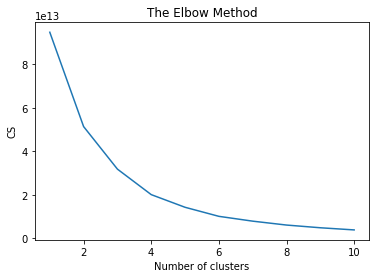

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [262]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,tol=.01 ,random_state = 42)

In [263]:
kms.fit(item_day)

KMeans(n_clusters=4, random_state=42, tol=0.01)

In [264]:
item_day['cluster1'] = kms.labels_

<ipython-input-264-539250dfe1a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_day['cluster1'] = kms.labels_


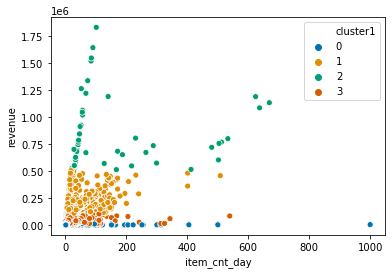

In [265]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue='cluster1', data=item_day,palette='colorblind'
)

In [266]:
item_day.groupby('cluster1').revenue.min()

cluster1
0         0.070000
1    106776.000000
2    512632.999999
3     12263.720000
Name: revenue, dtype: float64

In [267]:
item_day.groupby('cluster1').revenue.max()

cluster1
0    1.224500e+04
1    5.038200e+05
2    1.829990e+06
3    1.060660e+05
Name: revenue, dtype: float64

In [268]:
item_day.groupby('cluster1').item_cnt_day.min()

cluster1
0     1.0
1     4.0
2    21.0
3     1.0
Name: item_cnt_day, dtype: float64

In [269]:
item_day.groupby('cluster1').item_cnt_day.max()

cluster1
0    1000.0
1     508.0
2     669.0
3     539.0
Name: item_cnt_day, dtype: float64

# 2

In [270]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10,tol=.001 ,random_state = 42)
    kms.fit(item_day.drop('cluster1',axis=1))
    cs.append(kms.inertia_)

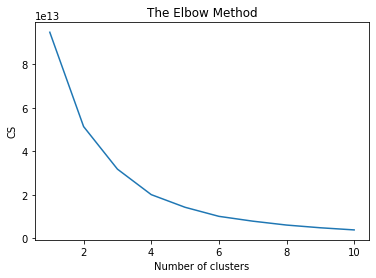

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [272]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 15,tol=.001 ,random_state = 42)
kms.fit(item_day.drop('cluster1',axis=1))

KMeans(max_iter=500, n_clusters=4, n_init=15, random_state=42, tol=0.001)

In [273]:
item_day['cluster2'] = kms.labels_

<ipython-input-273-a9aa10837622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_day['cluster2'] = kms.labels_


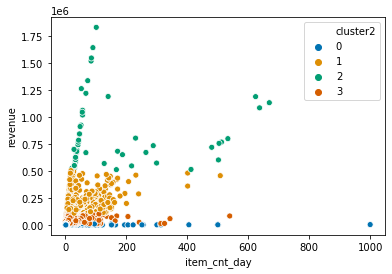

In [274]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue='cluster2', data=item_day,palette='colorblind'
)

In [275]:
item_day.groupby('cluster2').revenue.max()

cluster2
0    1.224500e+04
1    5.038200e+05
2    1.829990e+06
3    1.060660e+05
Name: revenue, dtype: float64

In [276]:
item_day.groupby('cluster2').revenue.min()

cluster2
0         0.070000
1    106776.000000
2    512632.999999
3     12263.720000
Name: revenue, dtype: float64

In [277]:
item_day.groupby('cluster2').item_cnt_day.max()

cluster2
0    1000.0
1     508.0
2     669.0
3     539.0
Name: item_cnt_day, dtype: float64

In [278]:
item_day.groupby('cluster2').item_cnt_day.min()

cluster2
0     1.0
1     4.0
2    21.0
3     1.0
Name: item_cnt_day, dtype: float64

# 3

In [279]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10,tol=.05 ,random_state = 42)
    kms.fit(item_day.drop(['cluster1','cluster2'],axis=1))
    cs.append(kms.inertia_)

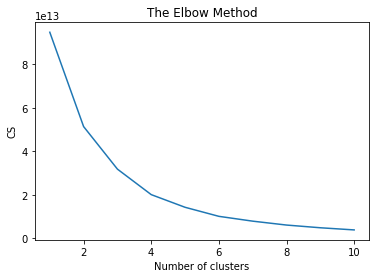

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [281]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 10,tol=.05 ,random_state = 42)
kms.fit(item_day.drop(['cluster1','cluster2'],axis=1))

KMeans(max_iter=500, n_clusters=4, random_state=42, tol=0.05)

In [282]:
item_day['cluster3'] = kms.labels_

<ipython-input-282-28a52dfd34bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_day['cluster3'] = kms.labels_


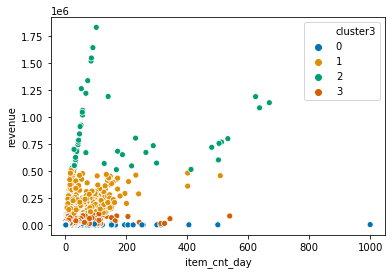

In [283]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue='cluster3', data=item_day,palette='colorblind'
)

In [284]:
item_day.groupby('cluster3').revenue.max()

cluster3
0    1.224500e+04
1    5.038200e+05
2    1.829990e+06
3    1.060660e+05
Name: revenue, dtype: float64

In [285]:
item_day.groupby('cluster2').revenue.min()

cluster2
0         0.070000
1    106776.000000
2    512632.999999
3     12263.720000
Name: revenue, dtype: float64

# 4

In [286]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15,tol=.002 ,random_state = 42)
    kms.fit(item_day.drop(['cluster1','cluster2','cluster3'],axis=1))
    cs.append(kms.inertia_)



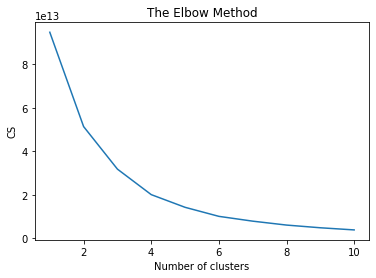

In [287]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [288]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 15,tol=.001 ,random_state = 42)
kms.fit(item_day.drop('cluster1',axis=1))








KMeans(max_iter=500, n_clusters=4, n_init=15, random_state=42, tol=0.001)

In [289]:
item_day['cluster4'] = kms.labels_

<ipython-input-289-c40fbe8ba820>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_day['cluster4'] = kms.labels_


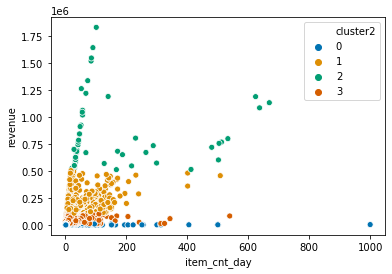

In [290]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue='cluster2', data=item_day,palette='colorblind'
)

In [291]:
item_day.groupby('cluster4').revenue.max()


cluster4
0    1.224500e+04
1    5.038200e+05
2    1.829990e+06
3    1.060660e+05
Name: revenue, dtype: float64

In [292]:
item_day.groupby('cluster4').revenue.min()

cluster4
0         0.070000
1    106776.000000
2    512632.999999
3     12263.720000
Name: revenue, dtype: float64

In [293]:
cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10,tol=.005 ,random_state = 42)
    kms.fit(item_day.drop(['cluster1','cluster2','cluster3','cluster4'],axis=1))
    cs.append(kms.inertia_)

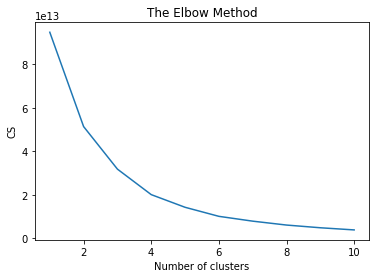

In [294]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [295]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 10,tol=.005 ,random_state = 42)
kms.fit(item_day.drop(['cluster1','cluster2','cluster3','cluster4'],axis=1))

KMeans(max_iter=500, n_clusters=4, random_state=42, tol=0.005)

In [296]:
item_day['cluster5'] = kms.labels_


<ipython-input-296-95d08a8f6a7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_day['cluster5'] = kms.labels_


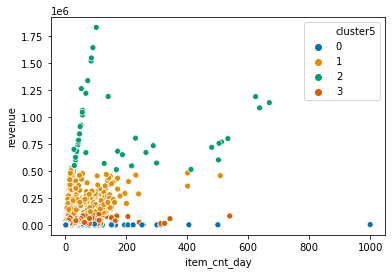

In [297]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue='cluster5', data=item_day,palette='colorblind'
)


In [298]:
item_day.groupby('cluster5').revenue.max()



cluster5
0    1.224500e+04
1    5.038200e+05
2    1.829990e+06
3    1.060660e+05
Name: revenue, dtype: float64

In [299]:
item_day.groupby('cluster5').revenue.min()

cluster5
0         0.070000
1    106776.000000
2    512632.999999
3     12263.720000
Name: revenue, dtype: float64

# 6

In [300]:
cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 20,tol=.005 ,random_state = 42)
    kms.fit(item_day.drop(['cluster1','cluster2','cluster3','cluster4','cluster5'],axis=1))
    cs.append(kms.inertia_)

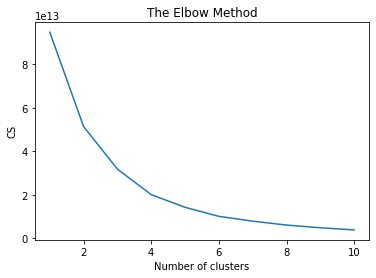

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()


In [302]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500, n_init = 20,tol=.005 ,random_state = 42)
kms.fit(item_day.drop(['cluster1','cluster2','cluster3','cluster4','cluster5'],axis=1))

KMeans(max_iter=500, n_clusters=4, n_init=20, random_state=42, tol=0.005)

In [303]:
item_day['cluster6'] = kms.labels_


<ipython-input-303-1c9cd5fd88d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_day['cluster6'] = kms.labels_


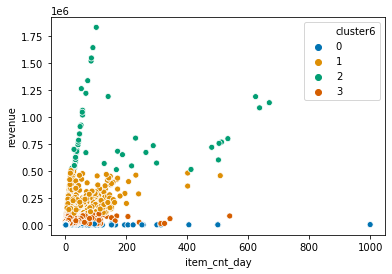

In [304]:
sns.scatterplot(
    x="item_cnt_day", y="revenue", hue='cluster6', data=item_day,palette='colorblind'
)


In [305]:
item_day.groupby('cluster6').revenue.max()



cluster6
0    1.224500e+04
1    5.038200e+05
2    1.829990e+06
3    1.060660e+05
Name: revenue, dtype: float64

In [306]:
item_day.groupby('cluster6').revenue.min()

cluster6
0         0.070000
1    106776.000000
2    512632.999999
3     12263.720000
Name: revenue, dtype: float64

# Item price vs Item_id

In [307]:
item_p  = train2[['item_id','item_price']]

In [308]:
kmns_p = KMeans(n_clusters=3)

In [309]:
kmns_p.fit(item_p)

KMeans(n_clusters=3)

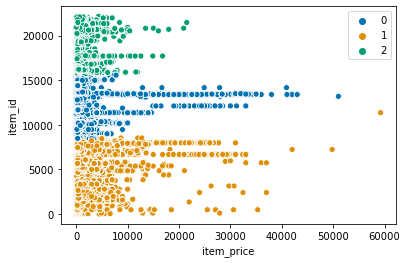

In [310]:
sns.scatterplot(
    x="item_price", y="item_id", hue=kmns_p.labels_, data=item_p,palette='colorblind'
)



# shop vs Item_cnt_day

In [311]:
shop_item_cnt = train2[['shop_id','item_cnt_day']]

In [312]:
kmns_s = KMeans(n_clusters=3)

In [313]:
kmns_s.fit(shop_item_cnt)

KMeans(n_clusters=3)

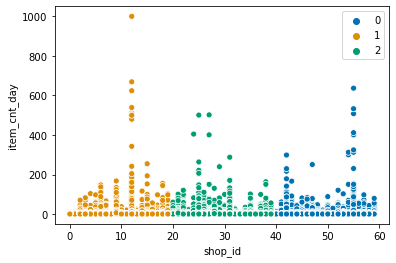

In [314]:
sns.scatterplot(
    x="shop_id", y="item_cnt_day", hue=kmns_s.labels_, data=shop_item_cnt,palette='colorblind'
)

# Submission on sample submission csv

In [315]:
test_X

,date_block_num,shop_id,item_id,city_id,shop_cat_id,item_category_id,type_id,subtype_id,month,year,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3
10913804,34,5,5037,26,7,19,10,2,11,2015,0.0,1.0,3.0
10913805,34,5,5320,26,7,55,15,10,11,2015,0.0,0.0,0.0
10913806,34,5,5233,26,7,19,10,2,11,2015,1.0,3.0,1.0
10913807,34,5,5232,26,7,23,10,2,11,2015,0.0,0.0,1.0
10913808,34,5,5268,26,7,20,10,2,11,2015,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,20,8,55,15,10,11,2015,1.0,0.0,0.0
11128000,34,45,16188,20,8,64,11,5,11,2015,0.0,0.0,0.0
11128001,34,45,15757,20,8,55,15,10,11,2015,0.0,0.0,0.0
11128002,34,45,19648,20,8,40,14,8,11,2015,0.0,0.0,0.0


In [316]:
submission = pd.read_csv('sample_submission.csv')

In [317]:
submission['item_cnt_month'] = pd.Series(x_pred)

In [318]:
submission['item_cnt_month'].sort_values(ascending=False)

86706    20.179705
21329    20.161907
46658    20.129807
97111    20.119320
86285    20.108711
           ...    
77516    -0.988534
77702    -1.143128
80494    -1.295454
80497    -1.295454
80111    -1.304432
Name: item_cnt_month, Length: 214200, dtype: float32

In [319]:
submission.to_csv('sample_sub1.csv')

# Submission on val_x

In [320]:


submission1 = pd.DataFrame({'ID':val_X.index, 'item_cnt_month':x_pred.reshape(238172,)})

In [321]:
submission1['item_cnt_month'].sort_values(ascending=False)

86706    20.179705
21329    20.161907
46658    20.129807
97111    20.119320
86285    20.108711
           ...    
77516    -0.988534
77702    -1.143128
80494    -1.295454
80497    -1.295454
80111    -1.304432
Name: item_cnt_month, Length: 238172, dtype: float32

In [322]:
submission1.to_csv('sampe_sub2.csv',index=False)

In [323]:
matrix

,date_block_num,shop_id,item_id,item_cnt_month,city_id,shop_cat_id,item_category_id,type_id,subtype_id,month,year,item_cnt_month_lag_1,item_cnt_month_lag_2,item_cnt_month_lag_3
1122795,3,2,27,0.0,0,8,19,10,2,4,2013,0.0,0.0,1.0
1122796,3,2,28,0.0,0,8,30,17,1,4,2013,0.0,0.0,0.0
1122797,3,2,30,0.0,0,8,40,14,8,4,2013,1.0,0.0,0.0
1122798,3,2,31,1.0,0,8,37,13,8,4,2013,1.0,4.0,0.0
1122799,3,2,32,0.0,0,8,40,14,8,4,2013,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127999,34,45,18454,0.0,20,8,55,15,10,11,2015,1.0,0.0,0.0
11128000,34,45,16188,0.0,20,8,64,11,5,11,2015,0.0,0.0,0.0
11128001,34,45,15757,0.0,20,8,55,15,10,11,2015,0.0,0.0,0.0
11128002,34,45,19648,0.0,20,8,40,14,8,11,2015,0.0,0.0,0.0


# Item_price vs Revenue

In [324]:
item_price_day = train2[['item_price','revenue']]

In [325]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,tol=.0001 ,random_state = 42)
    kms.fit(item_price_day)
    cs.append(kms.inertia_)

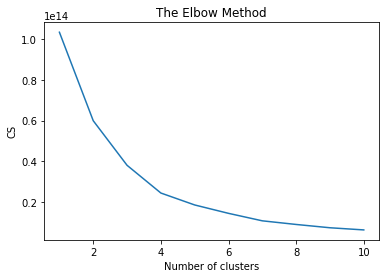

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [327]:
kms = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 10,tol=.0001 ,random_state = 42)
kms.fit(item_price_day)

KMeans(max_iter=500, n_clusters=5, random_state=42)

In [328]:
item_price_day['cluster'] = kms.labels_

<ipython-input-328-11d2f2b36a16>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_price_day['cluster'] = kms.labels_


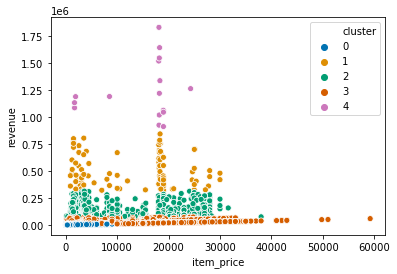

In [329]:
sns.scatterplot(
    x="item_price", y="revenue", hue='cluster', data=item_price_day,palette='colorblind'
)

In [330]:
item_price_day.groupby('cluster').revenue.max()

cluster
0    1.476232e+04
1    8.435400e+05
2    3.139130e+05
3    7.447600e+04
4    1.829990e+06
Name: revenue, dtype: float64

In [331]:
item_price_day.groupby('cluster').revenue.min()

cluster
0         0.07
1    321954.00
2     74950.00
3      9309.05
4    911520.00
Name: revenue, dtype: float64

In [332]:
item_price_day.groupby('cluster').item_price.max()

cluster
0     9300.000000
1    29990.000000
2    37991.000000
3    59200.000000
4    24278.461538
Name: item_price, dtype: float64

In [333]:
item_price_day.groupby('cluster').item_price.min()

cluster
0       0.070000
1     899.000000
2     155.192950
3     102.466942
4    1692.526158
Name: item_price, dtype: float64

# 1

In [344]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10,tol=.002 ,random_state = 42)
    kms.fit(item_price_day)
    cs.append(kms.inertia_)

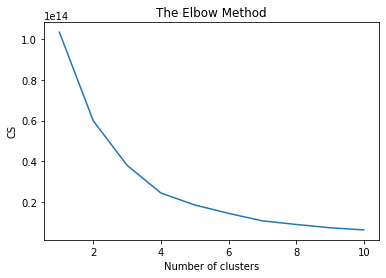

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [334]:
kms = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 10,tol=.002 ,random_state = 42)
kms.fit(item_price_day)

KMeans(max_iter=500, n_clusters=5, random_state=42, tol=0.002)

In [335]:
item_price_day['cluster1'] = kms.labels_

<ipython-input-335-38a600624c3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_price_day['cluster1'] = kms.labels_


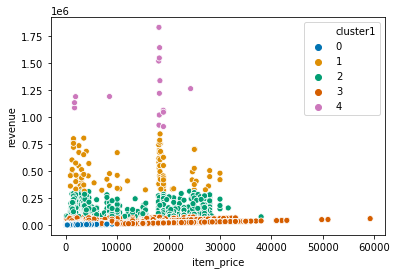

In [336]:
sns.scatterplot(
    x="item_price", y="revenue", hue='cluster1', data=item_price_day,palette='colorblind'
)

In [337]:
item_price_day.groupby('cluster1').item_price.max()

cluster1
0     9300.000000
1    29990.000000
2    37991.000000
3    59200.000000
4    24278.461538
Name: item_price, dtype: float64

In [338]:
item_price_day.groupby('cluster1').item_price.min()

cluster1
0       0.070000
1     899.000000
2     155.192950
3     102.466942
4    1692.526158
Name: item_price, dtype: float64

In [339]:
item_price_day.groupby('cluster1').revenue.max()

cluster1
0    1.476232e+04
1    8.435400e+05
2    3.128700e+05
3    7.437250e+04
4    1.829990e+06
Name: revenue, dtype: float64

In [340]:
item_price_day.groupby('cluster1').revenue.min()

cluster1
0         0.07
1    313913.00
2     74338.00
3      9309.05
4    911520.00
Name: revenue, dtype: float64

# 2

In [341]:
kms = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 10,tol=1 ,random_state = 42)
kms.fit(item_price_day)

KMeans(max_iter=500, n_clusters=5, random_state=42, tol=1)

In [342]:
item_price_day['cluster2'] = kms.labels_

<ipython-input-342-c15f1faece77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_price_day['cluster2'] = kms.labels_


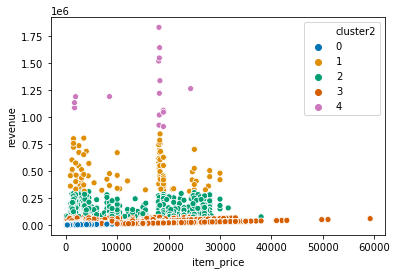

In [343]:
sns.scatterplot(
    x="item_price", y="revenue", hue='cluster2', data=item_price_day,palette='colorblind'
)

In [368]:
item_price_day.groupby('cluster2').revenue.min()

cluster2
0         0.07
1    312870.00
2     73479.00
3      9290.00
4    911520.00
Name: revenue, dtype: float64

In [369]:
item_price_day.groupby('cluster2').revenue.max()

cluster2
0    1.476232e+04
1    8.435400e+05
2    3.108855e+05
3    7.300000e+04
4    1.829990e+06
Name: revenue, dtype: float64

In [377]:
item_price_day.groupby('cluster2').item_price.min()

cluster2
0       0.070000
1     899.000000
2     155.192950
3     102.466942
4    1692.526158
Name: item_price, dtype: float64

In [378]:
item_price_day.groupby('cluster2').item_price.max()

cluster2
0     9241.000000
1    29990.000000
2    37991.000000
3    59200.000000
4    24278.461538
Name: item_price, dtype: float64

# 3

In [355]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 20,tol=.01 ,random_state = 42)
    kms.fit(item_price_day.drop(['cluster1','cluster2'],axis=1))
    cs.append(kms.inertia_)




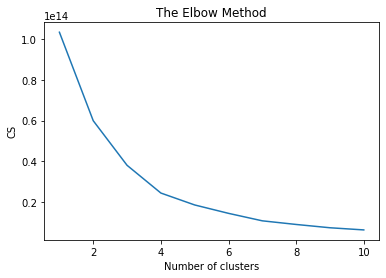

In [356]:
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [357]:
kms = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 500, n_init = 20,tol=.01 ,random_state = 42)
kms.fit(item_price_day.drop(['cluster1','cluster2'],axis=1))

KMeans(max_iter=500, n_clusters=5, n_init=20, random_state=42, tol=0.01)

In [358]:
item_price_day['cluster3'] = kms.labels_

<ipython-input-358-f30a652a6046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_price_day['cluster3'] = kms.labels_


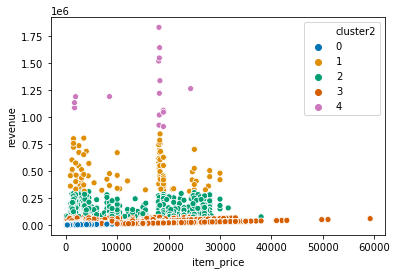

In [359]:
sns.scatterplot(
    x="item_price", y="revenue", hue='cluster2', data=item_price_day,palette='colorblind'
)

In [370]:
item_price_day.groupby('cluster3').revenue.min()

cluster3
0         0.07
1     74338.00
2    911520.00
3      9309.05
4    313913.00
Name: revenue, dtype: float64

In [371]:
item_price_day.groupby('cluster1').revenue.max()

cluster1
0    1.476232e+04
1    8.435400e+05
2    3.128700e+05
3    7.437250e+04
4    1.829990e+06
Name: revenue, dtype: float64

# Item_cnt vs Item_price

In [360]:
item_cnt_price = train2[['item_cnt_day','item_price']]

In [361]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,tol=.0001 ,random_state = 42)
    kms.fit(item_cnt_price)
    cs.append(kms.inertia_)




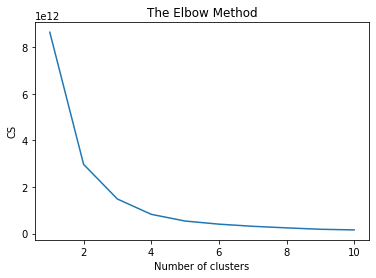

In [362]:
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [364]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,tol=.0001 ,random_state = 42)
kms.fit(item_cnt_price)

KMeans(n_clusters=4, random_state=42)

In [366]:
item_cnt_price['cluster'] = kms.labels_

<ipython-input-366-8c4dd05a1e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_cnt_price['cluster'] = kms.labels_


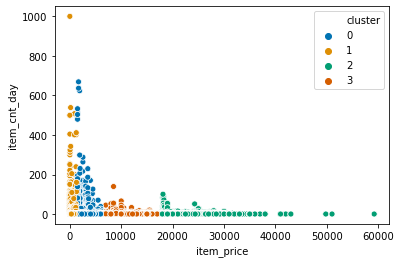

In [367]:
sns.scatterplot(
    x="item_price", y="item_cnt_day", hue='cluster', data=item_cnt_price,palette='colorblind'
)

In [372]:
item_cnt_price.groupby('cluster').item_price.min()

cluster
0     1420.620
1        0.070
2    17296.125
3     6920.000
Name: item_price, dtype: float64

In [374]:
item_cnt_price.groupby('cluster').item_price.max()

cluster
0     6900.000000
1     1420.333333
2    59200.000000
3    17215.300000
Name: item_price, dtype: float64

In [375]:
item_cnt_price.groupby('cluster').item_cnt_day.max()

cluster
0     669.0
1    1000.0
2     101.0
3     140.0
Name: item_cnt_day, dtype: float64

In [376]:
item_cnt_price.groupby('cluster').item_cnt_day.min()

cluster
0    1.0
1    1.0
2    1.0
3    1.0
Name: item_cnt_day, dtype: float64

# 1

In [382]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,tol=.001 ,random_state = 42)
    kms.fit(item_cnt_price.drop('cluster',axis=1))
    cs.append(kms.inertia_)




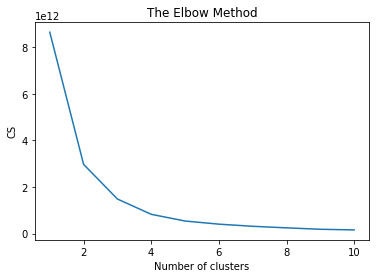

In [383]:
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [395]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10,tol=.001 ,random_state = 42)
kms.fit(item_cnt_price.drop('cluster',axis=1))

KMeans(n_clusters=4, random_state=42, tol=0.001)

In [396]:
item_cnt_price['cluster1']=kms.labels_

<ipython-input-396-7c1158c79050>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_cnt_price['cluster1']=kms.labels_


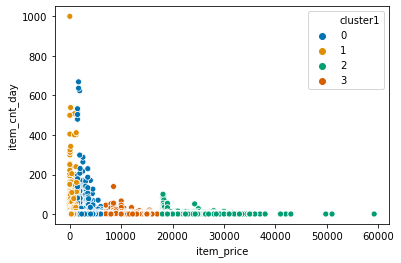

In [397]:
sns.scatterplot(
    x="item_price", y="item_cnt_day", hue='cluster1', data=item_cnt_price,palette='colorblind'
)

In [398]:
item_cnt_price.groupby('cluster1').item_price.min()


cluster1
0     1420.620
1        0.070
2    17296.125
3     6920.000
Name: item_price, dtype: float64

In [399]:
item_cnt_price.groupby('cluster1').item_price.max()

cluster1
0     6900.000000
1     1420.333333
2    59200.000000
3    17215.300000
Name: item_price, dtype: float64

In [400]:
item_cnt_price.groupby('cluster1').item_cnt_day.max()

cluster1
0     669.0
1    1000.0
2     101.0
3     140.0
Name: item_cnt_day, dtype: float64

In [401]:
item_cnt_price.groupby('cluster1').item_cnt_day.min()

cluster1
0    1.0
1    1.0
2    1.0
3    1.0
Name: item_cnt_day, dtype: float64

# 2 

In [402]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 8,tol=.002 ,random_state = 42)
    kms.fit(item_cnt_price.drop(['cluster','cluster1'],axis=1))
    cs.append(kms.inertia_)




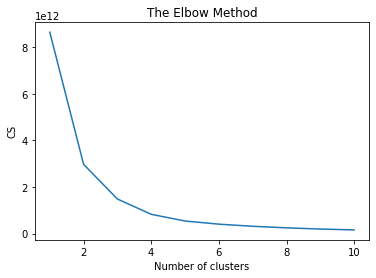

In [403]:
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [404]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 8,tol=.002 ,random_state = 42)
kms.fit(item_cnt_price.drop(['cluster','cluster1'],axis=1))

KMeans(n_clusters=4, n_init=8, random_state=42, tol=0.002)

In [405]:
item_cnt_price['cluster2']=kms.labels_

<ipython-input-405-92011c45869c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_cnt_price['cluster2']=kms.labels_


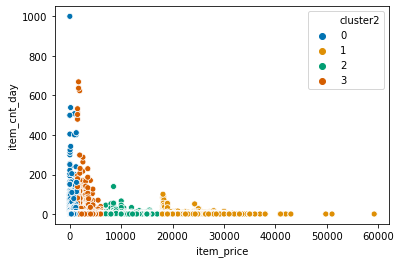

In [406]:
sns.scatterplot(
    x="item_price", y="item_cnt_day", hue='cluster2', data=item_cnt_price,palette='colorblind'
)

In [411]:
item_cnt_price.groupby('cluster2').item_price.min()



cluster2
0        0.070
1    17296.125
2     6890.000
3     1396.000
Name: item_price, dtype: float64

In [408]:
item_cnt_price.groupby('cluster2').item_price.max()

cluster2
0     1395.916667
1    59200.000000
2    17215.300000
3     6865.000000
Name: item_price, dtype: float64

In [409]:
item_cnt_price.groupby('cluster2').item_cnt_day.max()

cluster2
0    1000.0
1     101.0
2     140.0
3     669.0
Name: item_cnt_day, dtype: float64

In [410]:
item_cnt_price.groupby('cluster2').item_cnt_day.min()

cluster2
0    1.0
1    1.0
2    1.0
3    1.0
Name: item_cnt_day, dtype: float64

# 3 

In [412]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 8,tol=1 ,random_state = 42)
    kms.fit(item_cnt_price.drop(['cluster','cluster1','cluster2'],axis=1))
    cs.append(kms.inertia_)




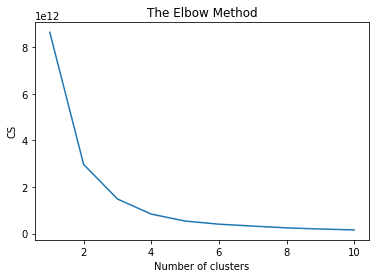

In [413]:
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [414]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 8,tol=1 ,random_state = 42)
kms.fit(item_cnt_price.drop(['cluster','cluster1','cluster2'],axis=1))

KMeans(n_clusters=4, n_init=8, random_state=42, tol=1)

In [415]:
item_cnt_price['cluster3']=kms.labels_

<ipython-input-415-4eb65f70ee7c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_cnt_price['cluster3']=kms.labels_


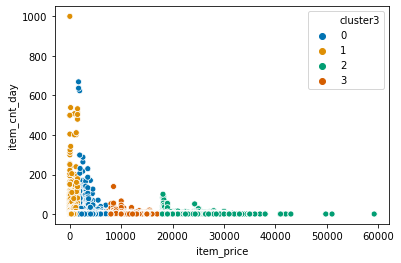

In [416]:
sns.scatterplot(
    x="item_price", y="item_cnt_day", hue='cluster3', data=item_cnt_price,palette='colorblind'
)

In [417]:
item_cnt_price.groupby('cluster3').item_price.min()


cluster3
0     1558.01
1        0.07
2    17489.50
3     7150.00
Name: item_price, dtype: float64

In [418]:
item_cnt_price.groupby('cluster3').item_price.max()

cluster3
0     7098.000000
1     1557.333333
2    59200.000000
3    17296.125000
Name: item_price, dtype: float64

In [419]:
item_cnt_price.groupby('cluster3').item_cnt_day.max()

cluster3
0     669.0
1    1000.0
2     101.0
3     140.0
Name: item_cnt_day, dtype: float64

In [420]:
item_cnt_price.groupby('cluster3').item_cnt_day.min()

cluster3
0    1.0
1    1.0
2    1.0
3    1.0
Name: item_cnt_day, dtype: float64

# 4

In [421]:

cs = []
for i in range(1, 11):
    kms = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 15,tol=.005 ,random_state = 42)
    kms.fit(item_cnt_price.drop(['cluster','cluster1','cluster2','cluster3'],axis=1))
    cs.append(kms.inertia_)




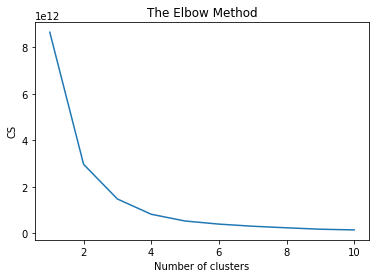

In [422]:
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [423]:
kms = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 15,tol=.005 ,random_state = 42)
kms.fit(item_cnt_price.drop(['cluster','cluster1','cluster2','cluster3'],axis=1))

KMeans(n_clusters=4, n_init=15, random_state=42, tol=0.005)

In [424]:
item_cnt_price['cluster4']=kms.labels_

<ipython-input-424-7a9759d2a038>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_cnt_price['cluster4']=kms.labels_


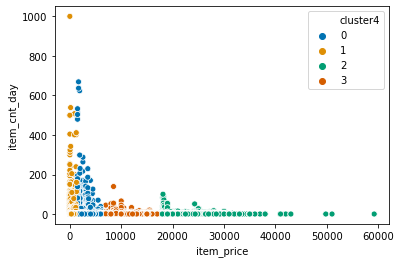

In [425]:
sns.scatterplot(
    x="item_price", y="item_cnt_day", hue='cluster4', data=item_cnt_price,palette='colorblind'
)

In [426]:
item_cnt_price.groupby('cluster4').item_price.min()


cluster4
0     1423.64
1        0.07
2    17489.50
3     6998.00
Name: item_price, dtype: float64

In [427]:
item_cnt_price.groupby('cluster4').item_price.max()

cluster4
0     6997.500
1     1423.500
2    59200.000
3    17296.125
Name: item_price, dtype: float64

In [428]:
item_cnt_price.groupby('cluster4').item_cnt_day.max()

cluster4
0     669.0
1    1000.0
2     101.0
3     140.0
Name: item_cnt_day, dtype: float64

In [431]:
item_cnt_price.groupby('cluster4').item_cnt_day.min()

cluster4
0    1.0
1    1.0
2    1.0
3    1.0
Name: item_cnt_day, dtype: float64